# Time series forecasting fondamentals with TensorFLow + Milestone Project 3: BitPredict 💰📈

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.
⚠️ **Note:** This is not financial advice.

Links: 
* All resources:https://github.com/mrdbourke/tensorflow-deep-learning
* Book version of actual code/text: https://dev.mrdbourke.com/tensorflow-deep-learning/ 

## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin/

In [1]:
!curl -o C:/Users/User/Time_series/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  174k  100  174k    0     0   334k      0 --:--:-- --:--:-- --:--:--  333k


## Importing time series with pandas

In [2]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) #Parse the date column and tell pandas column 1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have ?
len(df)

2787

We've collected the historical price of Bitcoin for ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (thousands to ten of thousands to millions).

A smaller number of samples is something you'll often run into with time series datav problems.

> 🔑 **Note:** The seasonality of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year. 

In [3]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


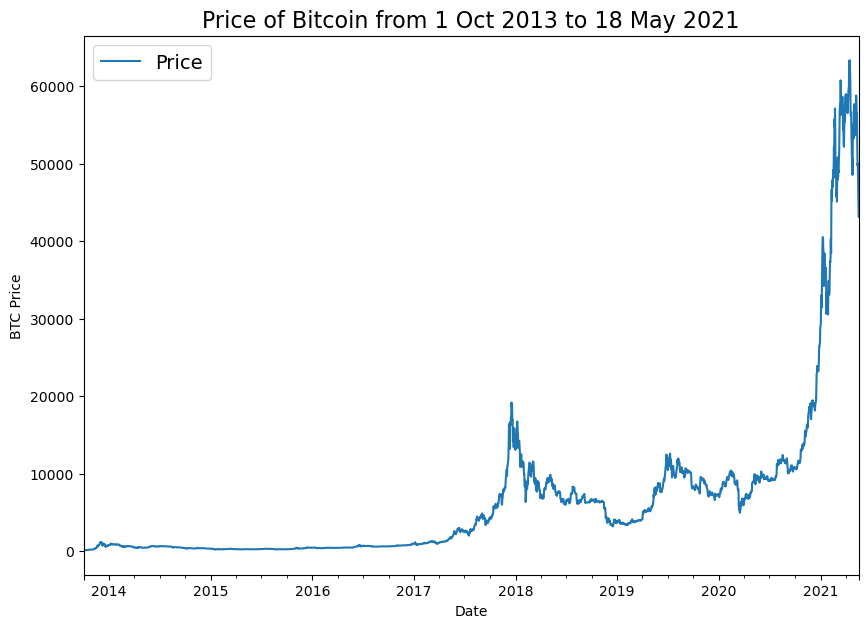

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14, loc="upper left");

## Importing time series data with Python's CSV module

In [49]:
# Importing and formatting historical Bitcoin data with Python 
import csv
from datetime import datetime

timesteps = []
btc_price = []


with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader) # Skip the first line
    
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # Get the date as dae not string
        btc_price.append(float(line[2])) # Get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 May 2021')

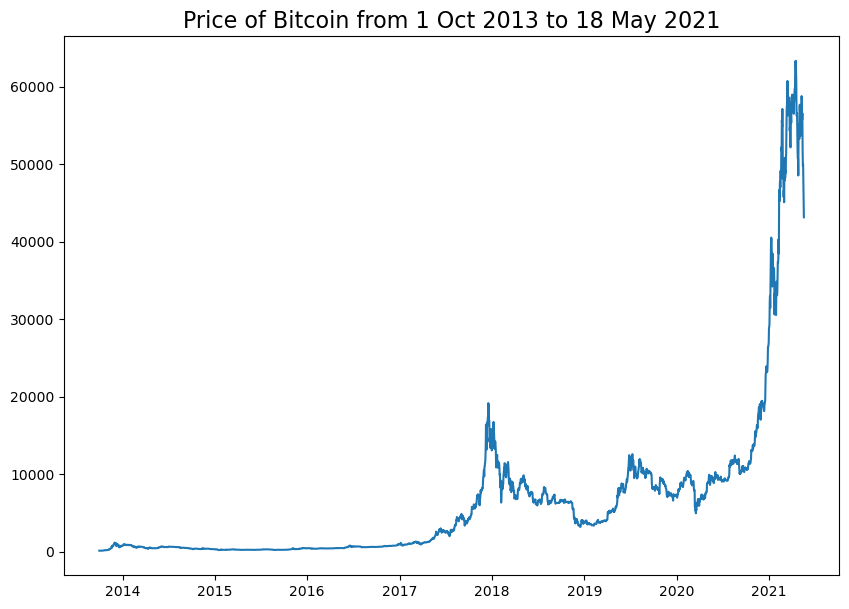

In [8]:
# Plot from CSV
import matplotlib.pyplot
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)

## Format data part 1: Create train and test sets for our time series data


### Creating train and test sets with time series data (the wrong way)

In [9]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [4]:
# Get bitcoin date  array 
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [5]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

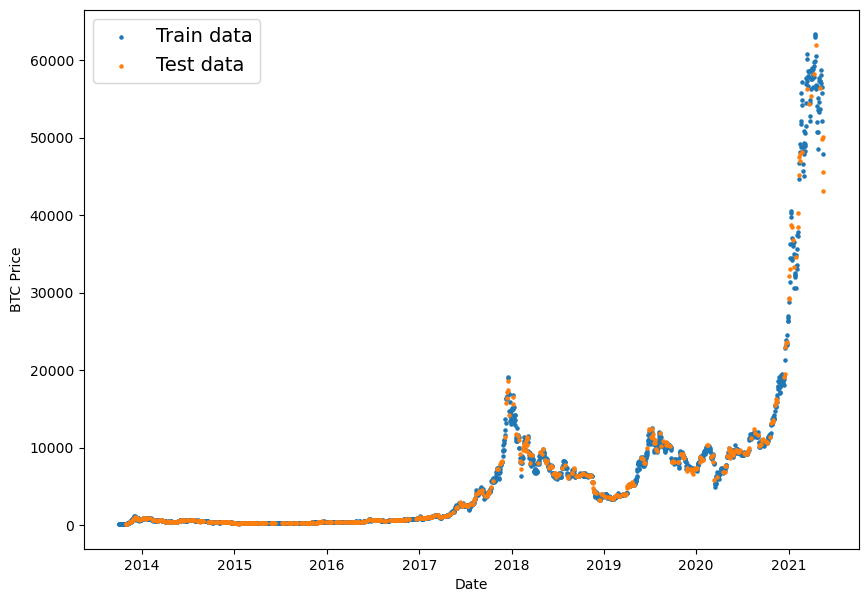

In [11]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train & test sets for time series (the right way)

In [6]:
# Create train & test splits the wright way for time series data
split_size = int(0.8 * len(prices)) # train

# Create train data split (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data split
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

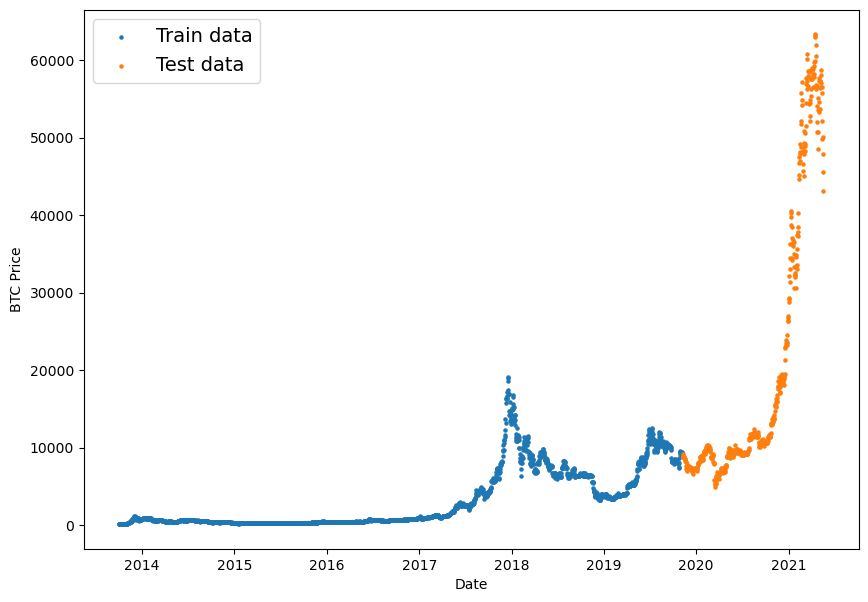

In [13]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [7]:
# Create a function to plot time series data 
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps).
    
    Parameters
    ----------
    timesteps : array of timestep values
    values : array of values across times
    format : style of plot, default "." 
    start : where to start the plot (setting a value will index from start of timesteps & values) 
    end : where to end the plot (similar to start but for the end) 
    label: label to show on plot about values, default None
    """   
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

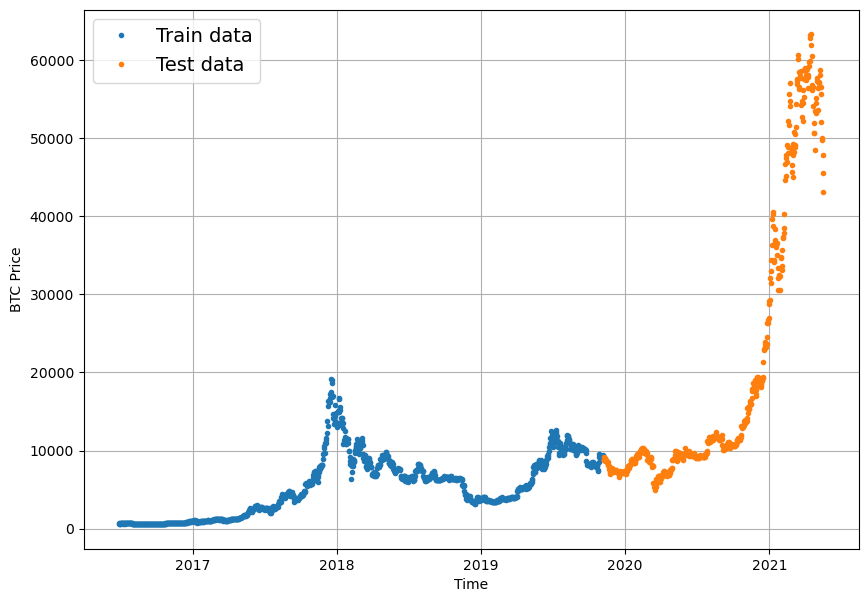

In [15]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, start=1000, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict **horizon**

In [8]:
from IPython.display import display, Markdown

table = "| Model Number | Model Type | Horizon size | Window size | Extra data |\n" \
        "| ----- | ----- | ----- | ----- | ----- |\n" \
        "| 0 | Naïve model (baseline) | NA | NA | NA |\n" \
        "| 1 | Dense model | 1 | 7 | NA |\n" \
        "| 2 | Same as 1 | 1 | 30 | NA | \n" \
        "| 3 | Same as 1 | 7 | 30 | NA |\n" \
        "| 4 | Conv1D | 1 | 7 | NA |\n" \
        "| 5 | LSTM | 1 | 7 | NA |\n" \
        "| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |\n" \
        "| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |\n" \
        "| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | \n" \
        "| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| \n" \
        "| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |\n"

display(Markdown(table))

# Modelling experiments we're running:

| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |


## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is horizon of 1.

In [9]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

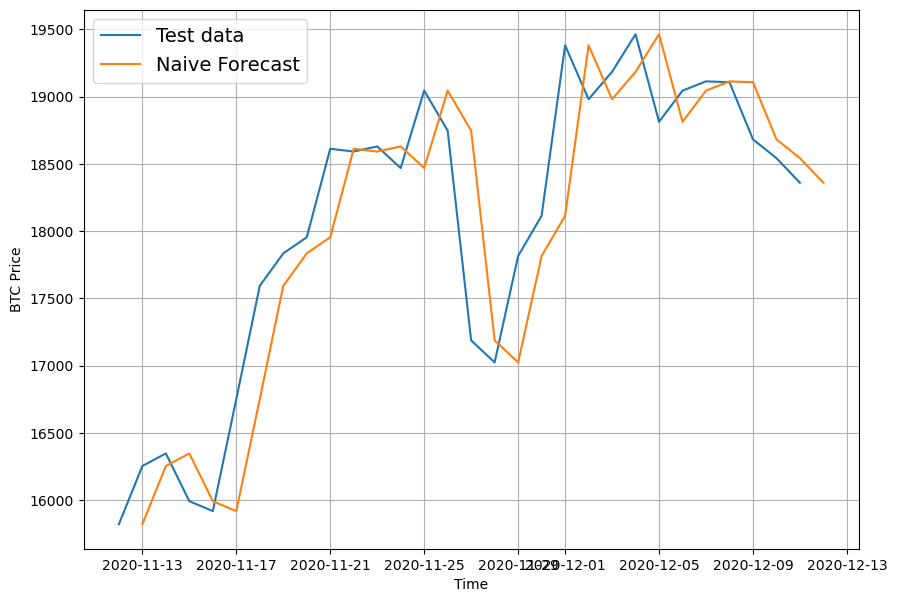

In [19]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=370, end=400, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=370, end=400, format="-", label="Naive Forecast")

> 🛠️ **Exercice:** Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autoregressive come up ?

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing ?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squarred error
* RMSE - root mean squarred error
* MAPE/sMAPE - (symmetric) mean absolute percentage error 
* MASE - mean absolute scaled error

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than a MAE of 100. 

> 📖 **Resources:** For a deeper dive into the various kinds of time series forecasting methods see: [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html)

In [10]:
import tensorflow as tf

In [11]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality).
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    
    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Our seasonality is 1 day (hence the shift of 1)
    
    return mae / mae_naive_no_season

In [22]:
mean_absolute_scaled_error(y_true=y_test[1:],
                           y_pred=naive_forecast).numpy()

0.9995699939182626

In [12]:
from tensorflow.keras import metrics

In [13]:
# Create a function to take in model prediction and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    # Calculate various evaluation metrics
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

That's one good looking evaluation function !

Let's now see if it works...

In [14]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Other models you can use for baselines and for actual forecast

In this notebook, we're focused on TensorFlow and deep learning models.

However, there are plenty of other styles and time series forecasting models you may want to experiment with:https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window ?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7] 
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [26]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [15]:
# Let's setup global variables for window horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [16]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
    """
    Create labels for windowed dataset.
    
    E.g if horizon=1
    Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output:([0, 1, 2, 3, 4, 5, 6], [7])
    """
    return x[:, :-horizon], x[:,-horizon: ]   

In [17]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(10), axis=0), 7)
print(f"Window: {tf.squeeze(test_window).numpy()} -> test_label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2] -> test_label: [3 4 5 6 7 8 9]


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, hat'd be quite slow.

To speed things up, we'll leverage Numpy's array indexing - https://numpy.org/doc/stable/user/basics.indexing.html

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use Numpy indexing to create a 2D array of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6, 7],
 [2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of mutliple window steps (from 2.) to index on a target series (e.g the historical price of Bitcoin) 
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

> 📖 **Resource:** The function we're about to create has been adapted from the following article:https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [18]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
    """
    # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    
    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # Create 2D of windows of size window_size
    
    print(f"Window indexes:\n {window_indexes, window_indexes.shape}")
    
    # 3. Index on the target array (a time series) with 2D array of multiple windows steps
    windowed_array = x[window_indexes]
    print(windowed_array)
    
    # 4. Get the labelled windows 
    windows, labels = get_labelled_windows(windowed_array, horizon)
    
    return windows, labels

In [19]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [32]:
# View the first 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [33]:
# View the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


> 🔑 **Note:** There's a function which does similar to the above in tf.keras.preprocessing, an extension could be to try and replicate what we've done using the premade function: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into training and test sets

In [20]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of windows and labels into train and test splits.
    """
    split_size=int(len(windows)* (1-test_split)) # This will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    
    return train_windows, test_windows, train_labels, test_labels

In [21]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [36]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [37]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but were training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [22]:
# Import our checkpoint callback function
from course_ztm import CreateModelCheckpoint

## Model 1: Dense model (window=7, horizon=1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLu
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 # Because our data are small only 7 numbers
* 100 epochs

Why these values ?

From experimentation.

* **Hyperparameters** = values a machine learning practionner can adjust themselves.
* **Parameters** = values a model learns on its own.

In [82]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for a reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model 
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation.
], name="model_1_dense") # name our model so we can save it.

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[CreateModelCheckpoint("C:/Users/User/Time_series/checkpoints/"+model_1.name,"val_loss", False)])

Epoch 1/100
 1/18 [>.............................] - ETA: 7s - loss: 4749.8647 - mae: 4749.8647 - mse: 46353632.0000

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 1s 33ms/step - loss: 2659.7861 - mae: 2659.7861 - mse: 19463512.0000 - val_loss: 4537.9829 - val_mae: 4537.9829 - val_mse: 38592756.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 524.5394 - mae: 524.5394 - mse: 949153.3750

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 383.9817 - mae: 383.9817 - mse: 525778.5625 - val_loss: 1153.1257 - val_mae: 1153.1257 - val_mse: 3759838.2500
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 153.5943 - mae: 153.5943 - mse: 93073.3984

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 225.3433 - mae: 225.3433 - mse: 234693.7031 - val_loss: 996.5859 - val_mae: 996.5859 - val_mse: 3342826.7500
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 236.2042 - mae: 236.2042 - mse: 283671.8125

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 181.0344 - mae: 181.0344 - mse: 169920.1406 - val_loss: 966.8576 - val_mae: 966.8576 - val_mse: 3100100.2500
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 175.4659 - mae: 175.4659 - mse: 163361.8594 - val_loss: 977.5238 - val_mae: 977.5238 - val_mse: 3043030.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 130.6664 - mae: 130.6664 - mse: 64061.8008

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 172.5607 - mae: 172.5607 - mse: 157786.0781 - val_loss: 960.5709 - val_mae: 960.5709 - val_mse: 3100788.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 206.1036 - mae: 206.1036 - mse: 304699.8750

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 168.0912 - mae: 168.0912 - mse: 150542.4531 - val_loss: 938.6952 - val_mae: 938.6952 - val_mse: 2788794.2500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 140.5018 - mae: 140.5018 - mse: 74898.8438

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 163.7719 - mae: 163.7719 - mse: 144413.8125 - val_loss: 900.0491 - val_mae: 900.0491 - val_mse: 2653076.2500
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 160.6638 - mae: 160.6638 - mse: 141120.2969 - val_loss: 918.8484 - val_mae: 918.8484 - val_mse: 2606493.5000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 171.3151 - mae: 171.3151 - mse: 215133.9062

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 1s 47ms/step - loss: 157.3698 - mae: 157.3698 - mse: 135746.7031 - val_loss: 857.9749 - val_mae: 857.9749 - val_mse: 2432013.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 165.8891 - mae: 165.8891 - mse: 120725.0625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 152.6546 - mae: 152.6546 - mse: 128674.2188 - val_loss: 844.6647 - val_mae: 844.6647 - val_mse: 2304902.5000
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 148.9446 - mae: 148.9446 - mse: 123177.7109 - val_loss: 883.9332 - val_mae: 883.9332 - val_mse: 2338985.2500
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 147.8850 - mae: 147.8850 - mse: 122380.4609 - val_loss: 867.0471 - val_mae: 867.0471 - val_mse: 2250884.7500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 157.4600 - mae: 157.4600 - mse: 112972.1094

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 144.4930 - mae: 144.4930 - mse: 115188.4375 - val_loss: 816.2667 - val_mae: 816.2667 - val_mse: 2072465.0000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 147.1310 - mae: 147.1310 - mse: 84445.6406

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 141.5928 - mae: 141.5928 - mse: 111674.3047 - val_loss: 808.1348 - val_mae: 808.1348 - val_mse: 2015049.2500
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 126.0696 - mae: 126.0696 - mse: 67406.2031

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 1s 30ms/step - loss: 137.9000 - mae: 137.9000 - mse: 106863.1953 - val_loss: 807.0117 - val_mae: 807.0117 - val_mse: 1983390.8750
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 135.7295 - mae: 135.7295 - mse: 104523.9766 - val_loss: 809.8127 - val_mae: 809.8127 - val_mse: 1972050.0000
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 158.2330 - mae: 158.2330 - mse: 135012.3906

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 28ms/step - loss: 134.5980 - mae: 134.5980 - mse: 104125.3594 - val_loss: 736.6011 - val_mae: 736.6011 - val_mse: 1770798.0000
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 77.1428 - mae: 77.1428 - mse: 32513.2930

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 28ms/step - loss: 132.3447 - mae: 132.3447 - mse: 101253.3516 - val_loss: 727.6959 - val_mae: 727.6959 - val_mse: 1728177.8750
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 142.0000 - mae: 142.0000 - mse: 126118.8516

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 28ms/step - loss: 135.4416 - mae: 135.4416 - mse: 104470.1016 - val_loss: 712.1072 - val_mae: 712.1072 - val_mse: 1699014.0000
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 144.1369 - mae: 144.1369 - mse: 96823.7812

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 131.9906 - mae: 131.9906 - mse: 100786.0625 - val_loss: 703.1500 - val_mae: 703.1500 - val_mse: 1653764.0000
Epoch 22/100
18/18 [==============================] - 0s 3ms/step - loss: 129.4802 - mae: 129.4802 - mse: 97184.0625 - val_loss: 710.9247 - val_mae: 710.9247 - val_mse: 1643518.3750
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 131.7716 - mae: 131.7716 - mse: 79817.1953

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 128.8460 - mae: 128.8460 - mse: 95222.1562 - val_loss: 694.3010 - val_mae: 694.3010 - val_mse: 1598986.7500
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 137.9414 - mae: 137.9414 - mse: 98943.3359

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 127.7705 - mae: 127.7705 - mse: 95040.7188 - val_loss: 693.6580 - val_mae: 693.6580 - val_mse: 1629245.8750
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 132.0363 - mae: 132.0363 - mse: 67006.5312

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 128.4571 - mae: 128.4571 - mse: 93192.8672 - val_loss: 683.1704 - val_mae: 683.1704 - val_mse: 1587119.1250
Epoch 26/100
18/18 [==============================] - 0s 3ms/step - loss: 125.8310 - mae: 125.8310 - mse: 92062.7344 - val_loss: 683.7085 - val_mae: 683.7085 - val_mse: 1544420.1250
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 172.9822 - mae: 172.9822 - mse: 145350.5625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 126.7642 - mae: 126.7642 - mse: 90194.6484 - val_loss: 665.3061 - val_mae: 665.3061 - val_mse: 1506484.8750
Epoch 28/100
18/18 [==============================] - 0s 3ms/step - loss: 124.5690 - mae: 124.5690 - mse: 88994.7344 - val_loss: 706.2576 - val_mae: 706.2576 - val_mse: 1576022.8750
Epoch 29/100
18/18 [==============================] - 0s 3ms/step - loss: 129.2123 - mae: 129.2123 - mse: 94216.8750 - val_loss: 767.7102 - val_mae: 767.7102 - val_mse: 1738452.7500
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 131.4468 - mae: 131.4468 - mse: 94208.8359 - val_loss: 787.2781 - val_mae: 787.2781 - val_mse: 1791865.6250
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 137.4216 - mae: 137.4216 - mse: 99068.9531 - val_loss: 912.2314 - val_mae: 912.2314 - val_mse: 2203259.0000
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 150.9511 - mae: 150.9511 - mse: 

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 136.7883 - mae: 136.7883 - mse: 94675.5391 - val_loss: 652.9101 - val_mae: 652.9101 - val_mse: 1446811.3750
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 127.2743 - mae: 127.2743 - mse: 85781.6797 - val_loss: 675.3366 - val_mae: 675.3366 - val_mse: 1547066.0000
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 140.8104 - mae: 140.8104 - mse: 152704.8125

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 122.2893 - mae: 122.2893 - mse: 87766.1328 - val_loss: 644.8900 - val_mae: 644.8900 - val_mse: 1422630.1250
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 123.7005 - mae: 123.7005 - mse: 88377.4062 - val_loss: 686.5993 - val_mae: 686.5993 - val_mse: 1495540.8750
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 130.8188 - mae: 130.8188 - mse: 91392.3906 - val_loss: 723.8203 - val_mae: 723.8203 - val_mse: 1587409.0000
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 158.8436 - mae: 158.8436 - mse: 141678.2344

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 120.4564 - mae: 120.4564 - mse: 83883.2266 - val_loss: 636.8869 - val_mae: 636.8869 - val_mse: 1392241.8750
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 100.1444 - mae: 100.1444 - mse: 72108.9531

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 118.2133 - mae: 118.2133 - mse: 83705.8906 - val_loss: 636.0165 - val_mae: 636.0165 - val_mse: 1382563.6250
Epoch 39/100
18/18 [==============================] - 0s 3ms/step - loss: 117.9978 - mae: 117.9978 - mse: 83251.3984 - val_loss: 643.6486 - val_mae: 643.6486 - val_mse: 1434104.3750
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 117.4728 - mae: 117.4728 - mse: 82659.3203 - val_loss: 637.7425 - val_mae: 637.7425 - val_mse: 1412809.6250
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 117.5784 - mae: 117.5784 - mse: 82069.5391 - val_loss: 643.5525 - val_mae: 643.5525 - val_mse: 1428527.2500
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 106.0018 - mae: 106.0018 - mse: 57098.0547

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 120.2480 - mae: 120.2480 - mse: 84124.3672 - val_loss: 628.5082 - val_mae: 628.5082 - val_mse: 1355097.3750
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 115.9266 - mae: 115.9266 - mse: 80851.2812 - val_loss: 632.9076 - val_mae: 632.9076 - val_mse: 1391037.5000
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 120.9725 - mae: 120.9725 - mse: 85308.8984 - val_loss: 665.2037 - val_mae: 665.2037 - val_mse: 1480905.6250
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 83.9034 - mae: 83.9034 - mse: 39086.9844

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 115.7542 - mae: 115.7542 - mse: 80837.7188 - val_loss: 626.4509 - val_mae: 626.4509 - val_mse: 1339458.1250
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 86.1526 - mae: 86.1526 - mse: 48694.4766

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 116.1173 - mae: 116.1173 - mse: 80244.2891 - val_loss: 623.4843 - val_mae: 623.4843 - val_mse: 1357462.1250
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 116.6633 - mae: 116.6633 - mse: 81692.7734 - val_loss: 670.9017 - val_mae: 670.9017 - val_mse: 1422383.5000
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 115.8990 - mae: 115.8990 - mse: 78956.0469 - val_loss: 672.0439 - val_mae: 672.0439 - val_mse: 1421946.0000
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 174.5661 - mae: 174.5661 - mse: 127065.2188

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 18ms/step - loss: 118.2997 - mae: 118.2997 - mse: 80410.6875 - val_loss: 622.7425 - val_mae: 622.7425 - val_mse: 1323620.5000
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 143.7692 - mae: 143.7692 - mse: 155869.2500

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 115.7534 - mae: 115.7534 - mse: 79509.6562 - val_loss: 617.9713 - val_mae: 617.9713 - val_mse: 1315471.8750
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 97.2812 - mae: 97.2812 - mse: 50762.0078

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 115.1793 - mae: 115.1793 - mse: 77862.0469 - val_loss: 617.0182 - val_mae: 617.0182 - val_mse: 1306912.3750
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 114.6139 - mae: 114.6139 - mse: 79443.3828 - val_loss: 621.9689 - val_mae: 621.9689 - val_mse: 1343295.7500
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 61.5979 - mae: 61.5979 - mse: 20032.5195

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 117.3606 - mae: 117.3606 - mse: 81084.3203 - val_loss: 611.1456 - val_mae: 611.1456 - val_mse: 1293514.7500
Epoch 54/100
18/18 [==============================] - 0s 3ms/step - loss: 115.0052 - mae: 115.0052 - mse: 78920.1016 - val_loss: 633.6151 - val_mae: 633.6151 - val_mse: 1327008.0000
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 115.5715 - mae: 115.5715 - mse: 79434.0625 - val_loss: 647.9792 - val_mae: 647.9792 - val_mse: 1408512.8750
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 120.6791 - mae: 120.6791 - mse: 82607.6328 - val_loss: 959.3121 - val_mae: 959.3121 - val_mse: 2495370.5000
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 144.8371 - mae: 144.8371 - mse: 104749.8750 - val_loss: 647.5211 - val_mae: 647.5211 - val_mse: 1405407.7500
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 121.1188 - mae: 121.1188 - 

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 114.3794 - mae: 114.3794 - mse: 78854.6172 - val_loss: 609.9340 - val_mae: 609.9340 - val_mse: 1279646.8750
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 111.2925 - mae: 111.2925 - mse: 75358.3125 - val_loss: 614.3875 - val_mae: 614.3875 - val_mse: 1311468.3750
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 113.6806 - mae: 113.6806 - mse: 77459.5234 - val_loss: 661.4901 - val_mae: 661.4901 - val_mse: 1378008.6250
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 114.8237 - mae: 114.8237 - mse: 77789.3203 - val_loss: 680.4654 - val_mae: 680.4654 - val_mse: 1424353.6250
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 114.8188 - mae: 114.8188 - mse: 78255.2188 - val_loss: 612.1421 - val_mae: 612.1421 - val_mse: 1275434.1250
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 116.2601 - mae: 116.2601 - mse: 

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 115.0351 - mae: 115.0351 - mse: 76398.3203 - val_loss: 609.0642 - val_mae: 609.0642 - val_mse: 1293929.6250
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 110.9109 - mae: 110.9109 - mse: 74338.8047 - val_loss: 640.3372 - val_mae: 640.3372 - val_mse: 1371015.0000
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 119.4144 - mae: 119.4144 - mse: 76840.7422 - val_loss: 728.8416 - val_mae: 728.8416 - val_mse: 1622361.7500
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 129.8971 - mae: 129.8971 - mse: 87099.8516 - val_loss: 661.8774 - val_mae: 661.8774 - val_mse: 1425452.7500
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 118.1712 - mae: 118.1712 - mse: 118623.0625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 122.1881 - mae: 122.1881 - mse: 81907.7188 - val_loss: 593.3158 - val_mae: 593.3158 - val_mse: 1247616.0000
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 114.3596 - mae: 114.3596 - mse: 75325.9688 - val_loss: 629.6687 - val_mae: 629.6687 - val_mse: 1301655.6250
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 102.2173 - mae: 102.2173 - mse: 67098.1875

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 110.6839 - mae: 110.6839 - mse: 75283.9688 - val_loss: 591.5668 - val_mae: 591.5668 - val_mse: 1249438.5000
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 111.4320 - mae: 111.4320 - mse: 75080.0625 - val_loss: 596.1892 - val_mae: 596.1892 - val_mse: 1260600.0000
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 163.9859 - mae: 163.9859 - mse: 184052.3125

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 111.8632 - mae: 111.8632 - mse: 75588.4141 - val_loss: 588.8657 - val_mae: 588.8657 - val_mse: 1238973.5000
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 110.9656 - mae: 110.9656 - mse: 74375.7266 - val_loss: 592.7930 - val_mae: 592.7930 - val_mse: 1237438.8750
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 113.5259 - mae: 113.5259 - mse: 76035.1562 - val_loss: 601.1534 - val_mae: 601.1534 - val_mse: 1266951.2500
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 111.8321 - mae: 111.8321 - mse: 74314.4844 - val_loss: 591.4471 - val_mae: 591.4471 - val_mse: 1245570.1250
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 106.4095 - mae: 106.4095 - mse: 46653.3906

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 111.1282 - mae: 111.1282 - mse: 73947.7734 - val_loss: 586.8542 - val_mae: 586.8542 - val_mse: 1228700.0000
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 111.1257 - mae: 111.1257 - mse: 76102.9375 - val_loss: 635.8984 - val_mae: 635.8984 - val_mse: 1347891.5000
Epoch 80/100
18/18 [==============================] - 0s 3ms/step - loss: 113.2834 - mae: 113.2834 - mse: 75967.2422 - val_loss: 594.7180 - val_mae: 594.7180 - val_mse: 1251191.5000
Epoch 81/100
18/18 [==============================] - 0s 3ms/step - loss: 109.1380 - mae: 109.1380 - mse: 73357.1875 - val_loss: 587.3813 - val_mae: 587.3813 - val_mse: 1222711.6250
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 118.2122 - mae: 118.2122 - mse: 80302.5625 - val_loss: 605.6509 - val_mae: 605.6509 - val_mse: 1273774.3750
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 112.8815 - mae: 112.8815 - m

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 110.8759 - mae: 110.8759 - mse: 72072.3984 - val_loss: 584.7685 - val_mae: 584.7685 - val_mse: 1215366.2500
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 109.5008 - mae: 109.5008 - mse: 73374.1875 - val_loss: 591.0305 - val_mae: 591.0305 - val_mse: 1237104.0000
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 110.1163 - mae: 110.1163 - mse: 72249.7734 - val_loss: 589.2230 - val_mae: 589.2230 - val_mse: 1230616.8750
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 107.2920 - mae: 107.2920 - mse: 70663.3438 - val_loss: 614.5137 - val_mae: 614.5137 - val_mse: 1259448.5000
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 110.6152 - mae: 110.6152 - mse: 73492.9297 - val_loss: 614.3906 - val_mae: 614.3906 - val_mse: 1288398.5000
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 90.6953 - mae: 90.6953 - mse: 43

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 111.9716 - mae: 111.9716 - mse: 75073.5938 - val_loss: 583.3107 - val_mae: 583.3107 - val_mse: 1216253.8750
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 115.9521 - mae: 115.9521 - mse: 76503.6094 - val_loss: 618.7076 - val_mae: 618.7076 - val_mse: 1297742.3750
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6333 - mae: 111.6333 - mse: 74499.4219 - val_loss: 619.8232 - val_mae: 619.8232 - val_mse: 1268401.3750
Epoch 95/100
18/18 [==============================] - 0s 3ms/step - loss: 110.5917 - mae: 110.5917 - mse: 72200.3906 - val_loss: 595.7999 - val_mae: 595.7999 - val_mse: 1224550.5000
Epoch 96/100
18/18 [==============================] - 0s 3ms/step - loss: 118.0893 - mae: 118.0893 - mse: 77658.8672 - val_loss: 627.5756 - val_mae: 627.5756 - val_mse: 1316921.5000
Epoch 97/100
18/18 [==============================] - 0s 3ms/step - loss: 112.3930 - mae: 112.3930 - m

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 111.0513 - mae: 111.0513 - mse: 73243.4453 - val_loss: 581.2308 - val_mae: 581.2308 - val_mse: 1201153.8750
Epoch 100/100
18/18 [==============================] - 0s 3ms/step - loss: 108.3480 - mae: 108.3480 - mse: 70844.4062 - val_loss: 622.9111 - val_mae: 622.9111 - val_mse: 1274432.2500


In [93]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 936us/step - loss: 622.9112 - mae: 622.9112 - mse: 1274432.3750


[622.9111938476562, 622.9111938476562, 1274432.375]

In [101]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("C:/Users/User/Time_series/checkpoints/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 581.2308 - mae: 581.2308 - mse: 1201154.0000


[581.2308349609375, 581.2308349609375, 1201154.0]

## Making forecasts with the model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only pseudo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions.

In [23]:
def make_preds(model, input_data):
    """
    Uses model to make prediction on input_data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # Return 1D array of predictions 

In [102]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 759us/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8875.496 , 8733.616 , 8987.351 , 8824.222 , 8716.412 , 8711.374 ,
        8714.819 , 8479.723 , 8463.1045, 8498.834 ], dtype=float32)>)

In [103]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 581.23065,
 'mse': 1201153.8,
 'rmse': 1095.9716,
 'mape': 2.6043448,
 'mase': 1.0210613}

In [45]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

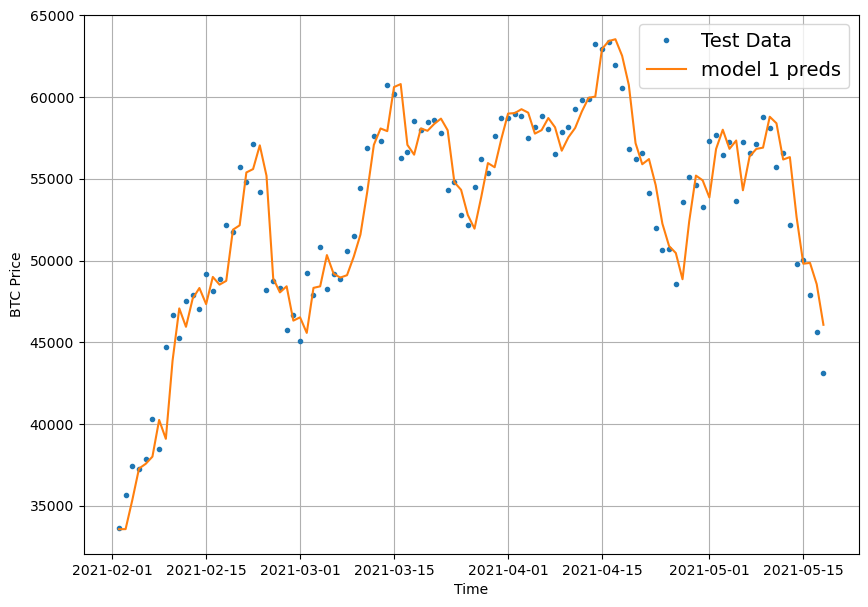

In [46]:
# Let's plot our model 1 predictions
offset=450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:,0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-", 
                 label="model 1 preds")

## Model 2: Dense (window = 30, horizon = 1)


In [104]:
HORIZON = 1 # Predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # Use 30 timesteps in past

In [105]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))
[[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.10158771 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2757, 2757)

In [106]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [50]:
# Set random seed for a reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model 
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense") # name our model so we can save it.

# 2. Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[CreateModelCheckpoint("C:/Users/User/Time_series/checkpoints/"+model_2.name,"val_loss", False)])

Epoch 1/100
 1/18 [>.............................] - ETA: 7s - loss: 5051.8672 - mae: 5051.8672 - mse: 62743568.0000

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 1s 33ms/step - loss: 2028.3315 - mae: 2028.3315 - mse: 15987249.0000 - val_loss: 2334.9106 - val_mae: 2334.9106 - val_mse: 14578875.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 732.4668 - mae: 732.4668 - mse: 1835388.2500

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 29ms/step - loss: 561.4421 - mae: 561.4421 - mse: 1302859.8750 - val_loss: 1917.7296 - val_mae: 1917.7296 - val_mse: 10727583.0000
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 424.1200 - mae: 424.1200 - mse: 799544.7500 - val_loss: 2180.4431 - val_mae: 2180.4431 - val_mse: 13329125.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 282.5471 - mae: 282.5471 - mse: 394169.8438

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 336.9068 - mae: 336.9068 - mse: 536489.1875 - val_loss: 1565.2439 - val_mae: 1565.2439 - val_mse: 7730524.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 300.7705 - mae: 300.7705 - mse: 328631.7500

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 292.8072 - mae: 292.8072 - mse: 406707.8750 - val_loss: 1393.7976 - val_mae: 1393.7976 - val_mse: 6156578.0000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 354.8822 - mae: 354.8822 - mse: 787565.0625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 261.2490 - mae: 261.2490 - mse: 331221.4062 - val_loss: 1315.5552 - val_mae: 1315.5552 - val_mse: 5420459.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 216.4972 - mae: 216.4972 - mse: 260541.3750

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 230.4841 - mae: 230.4841 - mse: 266542.0625 - val_loss: 1204.2812 - val_mae: 1204.2812 - val_mse: 4710293.0000
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 210.9590 - mae: 210.9590 - mse: 230937.3906 - val_loss: 1479.7600 - val_mae: 1479.7600 - val_mse: 5837324.0000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 244.0681 - mae: 244.0681 - mse: 284796.1250

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 209.4413 - mae: 209.4413 - mse: 214180.0312 - val_loss: 1090.0947 - val_mae: 1090.0947 - val_mse: 3915946.7500
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 229.1225 - mae: 229.1225 - mse: 321222.7812

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 1s 33ms/step - loss: 194.1332 - mae: 194.1332 - mse: 190397.7188 - val_loss: 1008.5625 - val_mae: 1008.5625 - val_mse: 3574481.2500
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 186.4023 - mae: 186.4023 - mse: 197322.2656

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 178.5594 - mae: 178.5594 - mse: 171079.2188 - val_loss: 974.5627 - val_mae: 974.5627 - val_mse: 3281929.0000
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 163.5056 - mae: 163.5056 - mse: 156097.1875

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 175.9076 - mae: 175.9076 - mse: 163621.9531 - val_loss: 945.2163 - val_mae: 945.2163 - val_mse: 3069550.5000
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 172.4934 - mae: 172.4934 - mse: 156781.2812 - val_loss: 995.4932 - val_mae: 995.4932 - val_mse: 3437859.5000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 234.8764 - mae: 234.8764 - mse: 305814.0938

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 171.7217 - mae: 171.7217 - mse: 154782.7500 - val_loss: 895.0638 - val_mae: 895.0638 - val_mse: 2804204.5000
Epoch 15/100
18/18 [==============================] - 0s 3ms/step - loss: 166.6891 - mae: 166.6891 - mse: 144107.0312 - val_loss: 908.2485 - val_mae: 908.2485 - val_mse: 2884620.0000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 151.1449 - mae: 151.1449 - mse: 106177.8438

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 159.8626 - mae: 159.8626 - mse: 135762.2031 - val_loss: 876.1574 - val_mae: 876.1574 - val_mse: 2571933.2500
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 156.1990 - mae: 156.1990 - mse: 133986.2031 - val_loss: 1059.4340 - val_mae: 1059.4340 - val_mse: 3150468.7500
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 162.3834 - mae: 162.3834 - mse: 136765.3281 - val_loss: 1060.1738 - val_mae: 1060.1738 - val_mse: 3136355.7500
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 158.1223 - mae: 158.1223 - mse: 128643.2969 - val_loss: 981.6410 - val_mae: 981.6410 - val_mse: 3150377.7500
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 169.3760 - mae: 169.3760 - mse: 117426.7344

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 154.1951 - mae: 154.1951 - mse: 126445.6875 - val_loss: 862.7606 - val_mae: 862.7606 - val_mse: 2395100.2500
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 143.8472 - mae: 143.8472 - mse: 104360.0391

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 161.6358 - mae: 161.6358 - mse: 136501.2031 - val_loss: 811.7996 - val_mae: 811.7996 - val_mse: 2236922.7500
Epoch 22/100
18/18 [==============================] - 0s 3ms/step - loss: 149.0086 - mae: 149.0086 - mse: 116509.8984 - val_loss: 827.7822 - val_mae: 827.7822 - val_mse: 2234356.0000
Epoch 23/100
18/18 [==============================] - 0s 3ms/step - loss: 146.4107 - mae: 146.4107 - mse: 115831.5938 - val_loss: 1195.1344 - val_mae: 1195.1344 - val_mse: 3626520.0000
Epoch 24/100
18/18 [==============================] - 0s 3ms/step - loss: 157.6252 - mae: 157.6252 - mse: 120172.4531 - val_loss: 837.7639 - val_mae: 837.7639 - val_mse: 2240408.2500
Epoch 25/100
18/18 [==============================] - 0s 3ms/step - loss: 150.2803 - mae: 150.2803 - mse: 117721.3125 - val_loss: 882.5807 - val_mae: 882.5808 - val_mse: 2356995.2500
Epoch 26/100
18/18 [==============================] - 0s 3ms/step - loss: 143.7624 - mae: 143.7

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 161.7636 - mae: 161.7636 - mse: 123200.6797 - val_loss: 778.6639 - val_mae: 778.6639 - val_mse: 2040727.3750
Epoch 28/100
18/18 [==============================] - 0s 3ms/step - loss: 141.0185 - mae: 141.0185 - mse: 106270.9297 - val_loss: 951.0652 - val_mae: 951.0652 - val_mse: 2829085.5000
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 212.3091 - mae: 212.3091 - mse: 193238.8438

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 159.2807 - mae: 159.2807 - mse: 124241.5000 - val_loss: 767.4115 - val_mae: 767.4115 - val_mse: 1994210.3750
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 143.7244 - mae: 143.7244 - mse: 108738.4219 - val_loss: 1117.4626 - val_mae: 1117.4626 - val_mse: 3198437.0000
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 145.4230 - mae: 145.4230 - mse: 108588.5547 - val_loss: 834.9522 - val_mae: 834.9522 - val_mse: 2310207.7500
Epoch 32/100
18/18 [==============================] - 0s 3ms/step - loss: 145.8407 - mae: 145.8407 - mse: 108808.6484 - val_loss: 779.3832 - val_mae: 779.3832 - val_mse: 1952218.3750
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 140.3574 - mae: 140.3574 - mse: 99475.9766 - val_loss: 980.9885 - val_mae: 980.9885 - val_mse: 2600833.0000
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 178.4856 - mae: 178.4856 -

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 154.6471 - mae: 154.6471 - mse: 112400.5703 - val_loss: 730.0603 - val_mae: 730.0603 - val_mse: 1790316.6250
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 140.4549 - mae: 140.4549 - mse: 100649.9766 - val_loss: 772.4793 - val_mae: 772.4793 - val_mse: 1982580.8750
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 142.8813 - mae: 142.8813 - mse: 101480.9844 - val_loss: 800.9194 - val_mae: 800.9194 - val_mse: 1952251.8750
Epoch 37/100
18/18 [==============================] - 0s 3ms/step - loss: 150.3076 - mae: 150.3076 - mse: 111420.3203 - val_loss: 769.4881 - val_mae: 769.4881 - val_mse: 1835221.5000
Epoch 38/100
18/18 [==============================] - 0s 3ms/step - loss: 145.5738 - mae: 145.5738 - mse: 102869.5547 - val_loss: 734.3706 - val_mae: 734.3706 - val_mse: 1738615.8750
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 135.8151 - mae: 135.815

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 171.8510 - mae: 171.8510 - mse: 126034.9688 - val_loss: 714.7824 - val_mae: 714.7824 - val_mse: 1719255.0000
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 90.9210 - mae: 90.9210 - mse: 32119.2949

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 172.9951 - mae: 172.9951 - mse: 127947.9297 - val_loss: 710.7682 - val_mae: 710.7682 - val_mse: 1695662.6250
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 136.2335 - mae: 136.2335 - mse: 96740.8516 - val_loss: 733.8755 - val_mae: 733.8755 - val_mse: 1714294.6250
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 128.6888 - mae: 128.6888 - mse: 88467.7812 - val_loss: 721.9692 - val_mae: 721.9692 - val_mse: 1732077.6250
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 138.5857 - mae: 138.5857 - mse: 97625.7812 - val_loss: 724.5070 - val_mae: 724.5070 - val_mse: 1681980.5000
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 137.8214 - mae: 137.8214 - mse: 85098.1562

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 129.6421 - mae: 129.6421 - mse: 87472.1328 - val_loss: 703.0275 - val_mae: 703.0275 - val_mse: 1660986.6250
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 132.3433 - mae: 132.3433 - mse: 88062.5000 - val_loss: 751.6205 - val_mae: 751.6205 - val_mse: 1839345.8750
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 131.4487 - mae: 131.4487 - mse: 93388.4141 - val_loss: 856.9130 - val_mae: 856.9130 - val_mse: 2059043.2500
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 150.9337 - mae: 150.9337 - mse: 102996.0703 - val_loss: 909.9431 - val_mae: 909.9431 - val_mse: 2240405.2500
Epoch 49/100
18/18 [==============================] - 0s 3ms/step - loss: 138.7734 - mae: 138.7734 - mse: 93071.5391 - val_loss: 726.9415 - val_mae: 726.9415 - val_mse: 1653470.1250
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 129.4387 - mae: 129.4387 - 

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 1s 34ms/step - loss: 133.8937 - mae: 133.8937 - mse: 92949.2266 - val_loss: 680.4048 - val_mae: 680.4048 - val_mse: 1550452.5000
Epoch 53/100
18/18 [==============================] - 0s 3ms/step - loss: 130.3109 - mae: 130.3109 - mse: 87076.6875 - val_loss: 875.4676 - val_mae: 875.4676 - val_mse: 2318488.0000
Epoch 54/100
18/18 [==============================] - 0s 3ms/step - loss: 134.4204 - mae: 134.4204 - mse: 91425.9688 - val_loss: 862.2766 - val_mae: 862.2766 - val_mse: 2064539.3750
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 140.2969 - mae: 140.2969 - mse: 93410.4453 - val_loss: 888.8314 - val_mae: 888.8314 - val_mse: 2146135.5000
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 171.7024 - mae: 171.7024 - mse: 129572.2578

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 146.6387 - mae: 146.6387 - mse: 100229.2500 - val_loss: 672.7621 - val_mae: 672.7621 - val_mse: 1501344.7500
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 125.6795 - mae: 125.6795 - mse: 83608.8672 - val_loss: 679.1670 - val_mae: 679.1670 - val_mse: 1518698.2500
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 125.2078 - mae: 125.2078 - mse: 84144.5469 - val_loss: 867.6060 - val_mae: 867.6060 - val_mse: 2251743.0000
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 167.4968 - mae: 167.4968 - mse: 117259.8750 - val_loss: 832.2393 - val_mae: 832.2393 - val_mse: 1962074.0000
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 132.8888 - mae: 132.8888 - mse: 88146.6953 - val_loss: 675.1212 - val_mae: 675.1212 - val_mse: 1504563.0000
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 118.0005 - mae: 118.0005 - mse

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 28ms/step - loss: 120.7801 - mae: 120.7801 - mse: 79774.6250 - val_loss: 670.4692 - val_mae: 670.4692 - val_mse: 1513859.2500
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 142.1926 - mae: 142.1926 - mse: 91033.7344 - val_loss: 1228.2479 - val_mae: 1228.2479 - val_mse: 3887159.2500
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 153.7939 - mae: 153.7939 - mse: 109719.9219 - val_loss: 725.6780 - val_mae: 725.6780 - val_mse: 1695536.7500
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 99.4413 - mae: 99.4413 - mse: 42193.0977

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 131.6669 - mae: 131.6669 - mse: 83969.3203 - val_loss: 661.3425 - val_mae: 661.3425 - val_mse: 1455028.0000
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 131.1711 - mae: 131.1711 - mse: 84220.1328 - val_loss: 717.2703 - val_mae: 717.2703 - val_mse: 1654355.7500
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 126.5503 - mae: 126.5503 - mse: 80644.1250 - val_loss: 684.5201 - val_mae: 684.5201 - val_mse: 1514248.2500
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 125.3598 - mae: 125.3598 - mse: 82278.4766 - val_loss: 678.7270 - val_mae: 678.7270 - val_mse: 1491166.0000
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 93.7065 - mae: 93.7065 - mse: 36007.7109

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 28ms/step - loss: 123.2369 - mae: 123.2369 - mse: 80427.9141 - val_loss: 645.5215 - val_mae: 645.5215 - val_mse: 1408925.6250
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 122.4411 - mae: 122.4411 - mse: 79552.8516 - val_loss: 964.6086 - val_mae: 964.6086 - val_mse: 2400386.2500
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 133.7206 - mae: 133.7206 - mse: 90439.7734 - val_loss: 888.5770 - val_mae: 888.5770 - val_mse: 2121100.0000
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 125.4375 - mae: 125.4375 - mse: 82563.0234 - val_loss: 653.9594 - val_mae: 653.9594 - val_mse: 1449858.7500
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 120.8325 - mae: 120.8325 - mse: 79369.2734 - val_loss: 702.0529 - val_mae: 702.0529 - val_mse: 1553877.3750
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 178.9808 - mae: 178.9808 - mse: 

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 122.5270 - mae: 122.5270 - mse: 80214.6719 - val_loss: 637.2319 - val_mae: 637.2319 - val_mse: 1386847.3750
Epoch 74/100
18/18 [==============================] - 0s 3ms/step - loss: 122.0835 - mae: 122.0835 - mse: 79304.0000 - val_loss: 695.5400 - val_mae: 695.5400 - val_mse: 1572185.0000
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 134.0843 - mae: 134.0843 - mse: 88552.8828 - val_loss: 699.3264 - val_mae: 699.3264 - val_mse: 1579190.8750
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 131.2550 - mae: 131.2550 - mse: 83860.4219 - val_loss: 656.5184 - val_mae: 656.5184 - val_mse: 1419120.7500
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 119.6548 - mae: 119.6548 - mse: 76591.2656 - val_loss: 655.2360 - val_mae: 655.2360 - val_mse: 1414658.1250
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 116.2238 - mae: 116.2238 - m

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 125.6056 - mae: 125.6056 - mse: 80179.4766 - val_loss: 627.1713 - val_mae: 627.1713 - val_mse: 1350103.0000
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 126.1704 - mae: 126.1704 - mse: 78923.9922 - val_loss: 819.8835 - val_mae: 819.8835 - val_mse: 1868749.2500
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 158.3958 - mae: 158.3958 - mse: 107926.8203 - val_loss: 637.2303 - val_mae: 637.2303 - val_mse: 1371351.5000
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 114.8516 - mae: 114.8516 - mse: 61266.4375

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 138.7037 - mae: 138.7037 - mse: 92776.2969 - val_loss: 626.4452 - val_mae: 626.4452 - val_mse: 1340831.1250
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 133.3447 - mae: 133.3447 - mse: 84429.4219 - val_loss: 775.5580 - val_mae: 775.5580 - val_mse: 1806186.6250
Epoch 88/100
 1/18 [>.............................] - ETA: 0s - loss: 159.4827 - mae: 159.4827 - mse: 121920.4219

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_2_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 122.3037 - mae: 122.3037 - mse: 78761.5859 - val_loss: 620.9462 - val_mae: 620.9462 - val_mse: 1320969.2500
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 114.1419 - mae: 114.1419 - mse: 73879.9141 - val_loss: 638.9951 - val_mae: 638.9951 - val_mse: 1361224.7500
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 118.6935 - mae: 118.6935 - mse: 74692.1172 - val_loss: 625.2406 - val_mae: 625.2406 - val_mse: 1341176.7500
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 115.0900 - mae: 115.0900 - mse: 73687.2891 - val_loss: 662.3536 - val_mae: 662.3536 - val_mse: 1456734.0000
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 118.0986 - mae: 118.0986 - mse: 77850.1328 - val_loss: 636.7778 - val_mae: 636.7778 - val_mse: 1357848.8750
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 137.5018 - mae: 137.5018 - m

In [51]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 938us/step - loss: 627.8898 - mae: 627.8898 - mse: 1327501.1250


[627.8898315429688, 627.8898315429688, 1327501.125]

In [108]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("C:/Users/User/Time_series/checkpoints/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 997us/step - loss: 620.9462 - mae: 620.9462 - mse: 1320969.3750


[620.9461669921875, 620.9461669921875, 1320969.375]

In [109]:
# Get the forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 762us/step


In [110]:
# Evaluate results for model 2 predictions 
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 620.9461,
 'mse': 1320969.0,
 'rmse': 1149.3341,
 'mape': 2.8030782,
 'mase': 1.0854199}

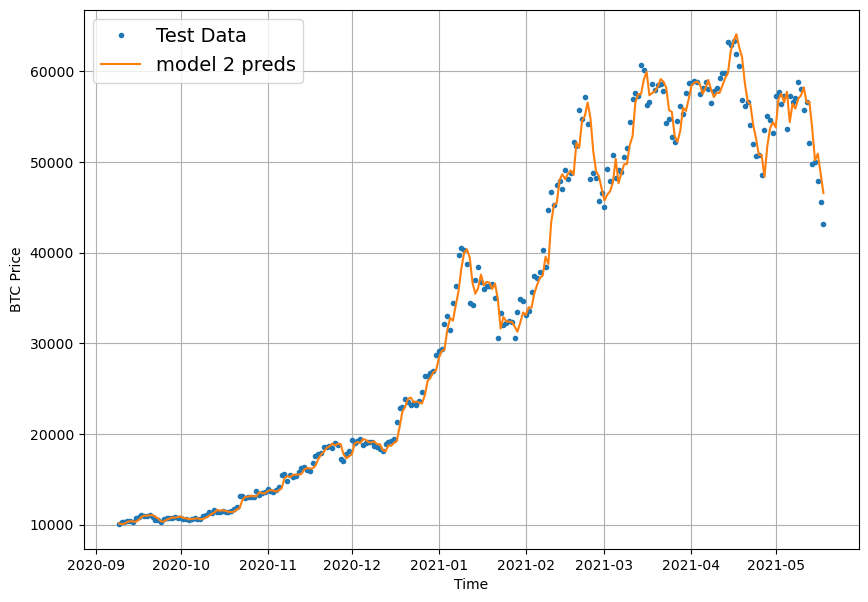

In [55]:
# Let's plot our model 1 predictions
offset=300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:,0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-", 
                 label="model 2 preds")

## Model 3: Dense (window = 30, horizon = 7)

In [111]:
HORIZON = 7 # Predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # Use 30 timesteps in past

In [112]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))
[[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.19724227 63223.88439079 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2751, 2751)

In [113]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [118]:
# Set random seed for a reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model as model 1 with different input and output data
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense") # name our model so we can save it.

# 2. Compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[CreateModelCheckpoint("C:/Users/User/Time_series/checkpoints/"+model_3.name,"val_loss", False)])

Epoch 1/100
 1/18 [>.............................] - ETA: 7s - loss: 3877.6831 - mae: 3877.6831 - mse: 51099532.0000

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 1s 33ms/step - loss: 1800.8265 - mae: 1800.8265 - mse: 16764209.0000 - val_loss: 2594.1284 - val_mae: 2594.1284 - val_mse: 18468786.0000
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 519.8010 - mae: 519.8010 - mse: 1199828.2500 - val_loss: 2663.2710 - val_mae: 2663.2710 - val_mse: 19756410.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 428.7954 - mae: 428.7954 - mse: 661244.7500

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 428.0063 - mae: 428.0063 - mse: 862223.5625 - val_loss: 2112.7205 - val_mae: 2112.7205 - val_mse: 13129955.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 449.6233 - mae: 449.6233 - mse: 938928.5625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 28ms/step - loss: 383.0204 - mae: 383.0204 - mse: 704991.6250 - val_loss: 1943.2445 - val_mae: 1943.2445 - val_mse: 11172770.0000
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 348.1803 - mae: 348.1803 - mse: 598749.1250 - val_loss: 1945.2883 - val_mae: 1945.2883 - val_mse: 11254386.0000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 288.4053 - mae: 288.4053 - mse: 346806.0625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 330.9865 - mae: 330.9865 - mse: 533587.8125 - val_loss: 1754.2368 - val_mae: 1754.2368 - val_mse: 9325936.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 288.5781 - mae: 288.5781 - mse: 445168.8750

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 310.3763 - mae: 310.3763 - mse: 479394.9688 - val_loss: 1646.2545 - val_mae: 1646.2545 - val_mse: 8385745.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 276.0061 - mae: 276.0061 - mse: 375347.5625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 301.9504 - mae: 301.9504 - mse: 445684.3438 - val_loss: 1578.6049 - val_mae: 1578.6049 - val_mse: 7988689.5000
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 292.0584 - mae: 292.0584 - mse: 422106.2188 - val_loss: 1680.3401 - val_mae: 1680.3401 - val_mse: 8492464.0000
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 293.7188 - mae: 293.7188 - mse: 414437.8750 - val_loss: 1588.9136 - val_mae: 1588.9137 - val_mse: 7752028.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 293.4819 - mae: 293.4819 - mse: 447423.2500

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 281.1896 - mae: 281.1896 - mse: 393613.1250 - val_loss: 1507.9612 - val_mae: 1507.9612 - val_mse: 7347777.0000
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 275.6095 - mae: 275.6095 - mse: 383870.7812 - val_loss: 1539.8589 - val_mae: 1539.8589 - val_mse: 7583303.0000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 250.5429 - mae: 250.5429 - mse: 368367.5625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 275.1071 - mae: 275.1071 - mse: 377181.5938 - val_loss: 1472.4767 - val_mae: 1472.4767 - val_mse: 7095004.0000
Epoch 14/100
18/18 [==============================] - 0s 3ms/step - loss: 273.9119 - mae: 273.9119 - mse: 374889.2188 - val_loss: 1479.8201 - val_mae: 1479.8201 - val_mse: 7098652.5000
Epoch 15/100
18/18 [==============================] - 0s 3ms/step - loss: 269.0001 - mae: 269.0001 - mse: 366406.0312 - val_loss: 1563.3239 - val_mae: 1563.3239 - val_mse: 7540226.0000
Epoch 16/100
18/18 [==============================] - 0s 3ms/step - loss: 267.0652 - mae: 267.0652 - mse: 359695.2812 - val_loss: 1493.4363 - val_mae: 1493.4363 - val_mse: 7086805.5000
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 265.0474 - mae: 265.0474 - mse: 358000.3438 - val_loss: 1611.1577 - val_mae: 1611.1577 - val_mse: 7832085.5000
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 263.1393 - ma

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 259.8448 - mae: 259.8448 - mse: 339345.8125 - val_loss: 1405.0485 - val_mae: 1405.0485 - val_mse: 6513879.0000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 275.5210 - mae: 275.5210 - mse: 506771.4375

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 263.9846 - mae: 263.9846 - mse: 346282.7812 - val_loss: 1384.7714 - val_mae: 1384.7714 - val_mse: 6356292.5000
Epoch 24/100
18/18 [==============================] - 0s 3ms/step - loss: 266.5345 - mae: 266.5345 - mse: 348503.5625 - val_loss: 1392.5317 - val_mae: 1392.5317 - val_mse: 6360065.0000
Epoch 25/100
18/18 [==============================] - 0s 3ms/step - loss: 252.6570 - mae: 252.6570 - mse: 327721.1875 - val_loss: 1495.0023 - val_mae: 1495.0023 - val_mse: 6985160.0000
Epoch 26/100
18/18 [==============================] - 0s 3ms/step - loss: 252.5839 - mae: 252.5839 - mse: 325634.4688 - val_loss: 1425.0873 - val_mae: 1425.0873 - val_mse: 6534490.5000
Epoch 27/100
18/18 [==============================] - 0s 3ms/step - loss: 252.0853 - mae: 252.0853 - mse: 330522.4688 - val_loss: 1451.9061 - val_mae: 1451.9061 - val_mse: 6563970.0000
Epoch 28/100
18/18 [==============================] - 0s 3ms/step - loss: 252.7975 - ma

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 247.4703 - mae: 247.4703 - mse: 316733.0312 - val_loss: 1355.3483 - val_mae: 1355.3483 - val_mse: 6097770.5000
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 248.0653 - mae: 248.0653 - mse: 316096.9062 - val_loss: 1380.2241 - val_mae: 1380.2241 - val_mse: 6197889.5000
Epoch 34/100
18/18 [==============================] - 0s 3ms/step - loss: 245.5318 - mae: 245.5318 - mse: 313082.8438 - val_loss: 1407.2936 - val_mae: 1407.2936 - val_mse: 6387897.5000
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 251.7923 - mae: 251.7923 - mse: 319721.8438 - val_loss: 1421.4628 - val_mae: 1421.4628 - val_mse: 6485829.5000
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 248.5852 - mae: 248.5852 - mse: 320875.9688 - val_loss: 1378.3647 - val_mae: 1378.3647 - val_mse: 6416167.0000
Epoch 37/100
18/18 [==============================] - 0s 3ms/step - loss: 260.4378 - ma

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 244.9741 - mae: 244.9741 - mse: 309273.3750 - val_loss: 1352.3993 - val_mae: 1352.3993 - val_mse: 6061566.5000
Epoch 39/100
18/18 [==============================] - 0s 3ms/step - loss: 245.3656 - mae: 245.3656 - mse: 308501.7812 - val_loss: 1366.7657 - val_mae: 1366.7657 - val_mse: 6087665.0000
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 242.4045 - mae: 242.4045 - mse: 307068.4062 - val_loss: 1501.7219 - val_mae: 1501.7219 - val_mse: 6820020.5000
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 242.8770 - mae: 242.8770 - mse: 304905.5938 - val_loss: 1420.4572 - val_mae: 1420.4572 - val_mse: 6362378.5000
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 184.4891 - mae: 184.4891 - mse: 193613.9375

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 245.0145 - mae: 245.0145 - mse: 313242.7500 - val_loss: 1351.8966 - val_mae: 1351.8966 - val_mse: 6033293.0000
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 285.5197 - mae: 285.5197 - mse: 465829.6875

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 238.7314 - mae: 238.7314 - mse: 298663.7812 - val_loss: 1310.5785 - val_mae: 1310.5785 - val_mse: 5824299.0000
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 242.5853 - mae: 242.5853 - mse: 307000.0625 - val_loss: 1362.5354 - val_mae: 1362.5354 - val_mse: 6061300.0000
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 240.7868 - mae: 240.7868 - mse: 304974.5312 - val_loss: 1551.9059 - val_mae: 1551.9059 - val_mse: 6983976.5000
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 244.9154 - mae: 244.9154 - mse: 309869.9062 - val_loss: 1331.9240 - val_mae: 1331.9240 - val_mse: 5932450.5000
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 240.8697 - mae: 240.8697 - mse: 303309.7188 - val_loss: 1395.1366 - val_mae: 1395.1366 - val_mse: 6151756.5000
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 240.7711 - ma

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 237.6404 - mae: 237.6404 - mse: 297418.5625 - val_loss: 1291.8428 - val_mae: 1291.8428 - val_mse: 5725359.5000
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 209.2614 - mae: 209.2614 - mse: 199159.7344

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 233.4859 - mae: 233.4859 - mse: 289570.0000 - val_loss: 1281.5724 - val_mae: 1281.5724 - val_mse: 5568456.5000
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 231.6522 - mae: 231.6522 - mse: 286698.6875 - val_loss: 1540.0889 - val_mae: 1540.0889 - val_mse: 6962367.0000
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 236.7772 - mae: 236.7772 - mse: 293455.6875 - val_loss: 1317.7772 - val_mae: 1317.7772 - val_mse: 5996286.5000
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 237.4214 - mae: 237.4214 - mse: 294369.9062 - val_loss: 1386.5785 - val_mae: 1386.5785 - val_mse: 6222743.0000
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 234.2271 - mae: 234.2271 - mse: 289213.0312 - val_loss: 1293.9238 - val_mae: 1293.9238 - val_mse: 5595619.0000
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 236.7469 - ma

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 239.2971 - mae: 239.2971 - mse: 299107.5312 - val_loss: 1262.0575 - val_mae: 1262.0575 - val_mse: 5415478.0000
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 235.8471 - mae: 235.8471 - mse: 295581.2812 - val_loss: 1290.4910 - val_mae: 1290.4910 - val_mse: 5724959.0000
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 297.5782 - mae: 297.5782 - mse: 494381.2500

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 231.8441 - mae: 231.8441 - mse: 284298.0938 - val_loss: 1255.3270 - val_mae: 1255.3270 - val_mse: 5488029.5000
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 226.1908 - mae: 226.1908 - mse: 276598.5312 - val_loss: 1286.2408 - val_mae: 1286.2408 - val_mse: 5595244.0000
Epoch 74/100
18/18 [==============================] - 0s 3ms/step - loss: 230.6005 - mae: 230.6005 - mse: 283481.3750 - val_loss: 1350.4752 - val_mae: 1350.4752 - val_mse: 5857596.0000
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 229.8376 - mae: 229.8376 - mse: 281412.7188 - val_loss: 1473.5729 - val_mae: 1473.5729 - val_mse: 6563235.0000
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 232.6025 - mae: 232.6025 - mse: 286634.0000 - val_loss: 1287.0070 - val_mae: 1287.0070 - val_mse: 5623674.0000
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 227.8494 - ma

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_3_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 226.2464 - mae: 226.2464 - mse: 274177.2188 - val_loss: 1242.6858 - val_mae: 1242.6858 - val_mse: 5470365.0000
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 230.0904 - mae: 230.0904 - mse: 278774.2812 - val_loss: 1314.3870 - val_mae: 1314.3870 - val_mse: 5579110.5000
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 228.2189 - mae: 228.2189 - mse: 275336.4688 - val_loss: 1347.3188 - val_mae: 1347.3188 - val_mse: 5791237.5000
Epoch 95/100
18/18 [==============================] - 0s 3ms/step - loss: 229.8394 - mae: 229.8394 - mse: 277005.1875 - val_loss: 1281.9528 - val_mae: 1281.9528 - val_mse: 5565736.0000
Epoch 96/100
18/18 [==============================] - 0s 3ms/step - loss: 229.6868 - mae: 229.6868 - mse: 278791.8125 - val_loss: 1479.6418 - val_mae: 1479.6418 - val_mse: 6433358.0000
Epoch 97/100
18/18 [==============================] - 0s 3ms/step - loss: 240.7034 - ma

In [119]:
# Evaluate model 3 on test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 938us/step - loss: 1443.1891 - mae: 1443.1891 - mse: 6371382.0000


[1443.1890869140625, 1443.1890869140625, 6371382.0]

In [120]:
# Load in the best performing model
model_3 = tf.keras.models.load_model("C:/Users/User/Time_series/checkpoints/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1242.6858 - mae: 1242.6858 - mse: 5470364.5000


[1242.685791015625, 1242.685791015625, 5470364.5]

In [121]:
# Get the forecast predictions
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

18/18 [==============================] - 0s 724us/step


In [125]:
# Create a function to take in model prediction and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    # Calculate various evaluation metrics
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    # Account for different sized metrics for longer horizons (we want to reduce metrics to a single value)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
    
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [126]:
# Evaluate results for model 3 predictions with agregated values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1242.6858,
 'mse': 5470364.5,
 'rmse': 1425.7883,
 'mape': 5.6604023,
 'mase': 2.2112896}

## Make our evaluation function work for larger horizons

In [65]:
model_2_results["mae"].shape

()

We've made and evaluated predictions with `model_3`, let's visualize, visualize, visualize ! 

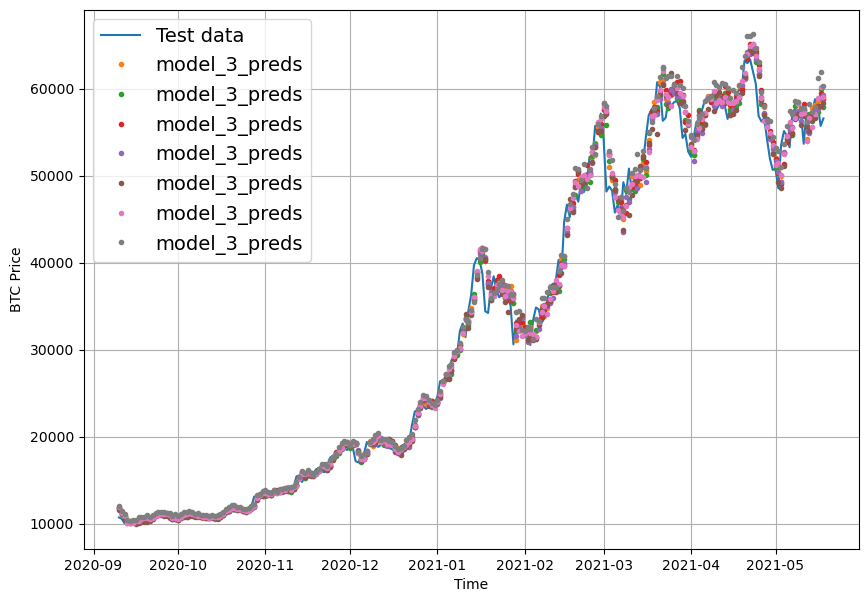

In [66]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:,0],
                 start=offset,
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=model_3_preds,
                 start=offset,              
                 label="model_3_preds")

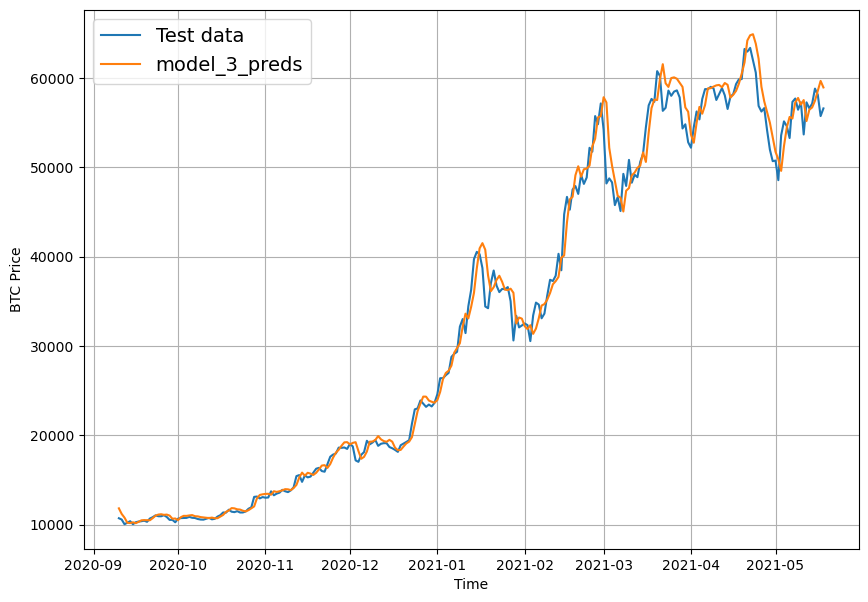

In [67]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:,0],
                 start=offset,
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds,axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

## Which of our models is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone...

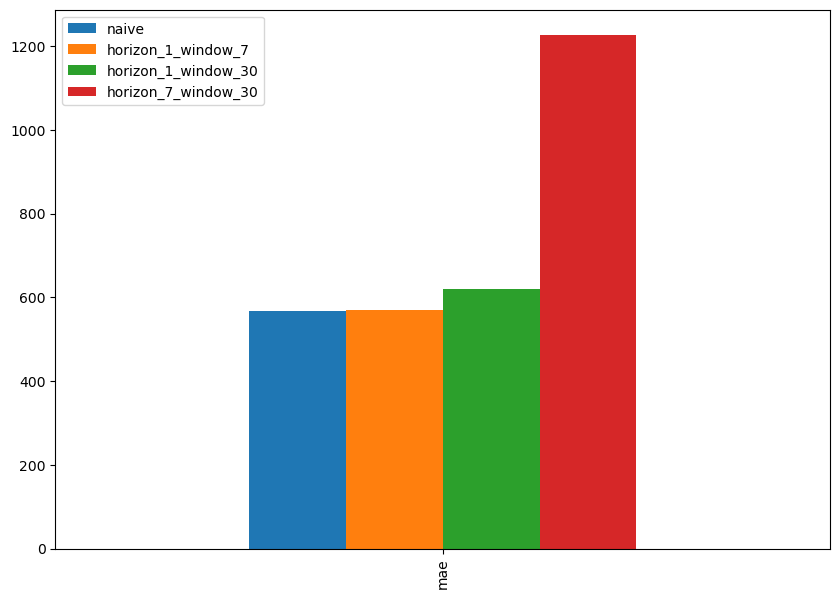

In [68]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              }, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4: Conv1D



In [127]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [128]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [129]:
# Make train/test set
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`...
    
However our data isn't in that shape yet...

In [72]:
# Check data input shape
train_windows[0].shape # returns (window_size,)

(7,)

In [130]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [131]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [75]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # WINDOW_SIZE 
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [76]:
# Create a Conv1D model
# Lambda layer
# Conv1D model, filters = 128, kernel_size=5 ,padding
# Output layer = dense

In [77]:
# Set random seed for a reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model as model 1 with different input and output data
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(128,
                  5,
                  activation="relu",
                  padding="causal"), # Useful when using temporal data
    layers.Dense(HORIZON)
], name="model_4_conv1D") # name our model so we can save it.

# 2. Compile
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_4.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[CreateModelCheckpoint("C:/Users/User/Time_series/checkpoints/"+model_4.name,"val_loss", False)])

Epoch 1/100
 1/18 [>.............................] - ETA: 10s - loss: 3518.3259 - mae: 3518.3259 - mse: 25472412.0000

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 2s 67ms/step - loss: 1803.1958 - mae: 1803.1958 - mse: 9524847.0000 - val_loss: 1801.9539 - val_mae: 1801.9539 - val_mse: 7699779.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 213.2243 - mae: 213.2243 - mse: 227747.9844

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 302.5211 - mae: 302.5211 - mse: 367957.5938 - val_loss: 1427.8844 - val_mae: 1427.8844 - val_mse: 5221186.5000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 186.1729 - mae: 186.1729 - mse: 127736.3047

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 61ms/step - loss: 217.0189 - mae: 217.0189 - mse: 227374.0625 - val_loss: 1037.7605 - val_mae: 1037.7605 - val_mse: 3524597.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 236.4791 - mae: 236.4791 - mse: 280123.3125

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 50ms/step - loss: 187.4719 - mae: 187.4719 - mse: 181457.0312 - val_loss: 1020.9614 - val_mae: 1020.9614 - val_mse: 3496253.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 196.0100 - mae: 196.0100 - mse: 140469.5312

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 182.5428 - mae: 182.5428 - mse: 175621.9844 - val_loss: 1015.7997 - val_mae: 1015.7997 - val_mse: 3374461.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 137.3193 - mae: 137.3193 - mse: 68744.1250

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 49ms/step - loss: 180.4750 - mae: 180.4750 - mse: 172244.4375 - val_loss: 1007.0319 - val_mae: 1007.0319 - val_mse: 3416263.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 223.6786 - mae: 223.6786 - mse: 349070.9375

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 50ms/step - loss: 179.0594 - mae: 179.0594 - mse: 169923.9219 - val_loss: 982.8332 - val_mae: 982.8332 - val_mse: 3241804.7500
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 174.5501 - mae: 174.5501 - mse: 163107.6875 - val_loss: 986.8997 - val_mae: 986.8997 - val_mse: 3150294.5000
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 172.1942 - mae: 172.1942 - mse: 159335.6562 - val_loss: 999.8866 - val_mae: 999.8866 - val_mse: 3129426.5000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 189.1774 - mae: 189.1774 - mse: 245033.2500

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 170.1243 - mae: 170.1243 - mse: 155708.5156 - val_loss: 944.0290 - val_mae: 944.0290 - val_mse: 2956234.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 189.0179 - mae: 189.0179 - mse: 147991.5312

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 52ms/step - loss: 167.5028 - mae: 167.5028 - mse: 150781.8750 - val_loss: 927.5300 - val_mae: 927.5300 - val_mse: 2894542.7500
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 166.4017 - mae: 166.4017 - mse: 147381.5469 - val_loss: 974.4216 - val_mae: 974.4216 - val_mse: 2910307.7500
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 163.4299 - mae: 163.4299 - mse: 142820.0938 - val_loss: 937.8641 - val_mae: 937.8641 - val_mse: 2766526.7500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 179.4089 - mae: 179.4089 - mse: 154301.7500

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 46ms/step - loss: 159.4410 - mae: 159.4410 - mse: 138049.6094 - val_loss: 905.9120 - val_mae: 905.9120 - val_mse: 2642811.5000
Epoch 15/100
18/18 [==============================] - 0s 3ms/step - loss: 158.5531 - mae: 158.5531 - mse: 137073.5469 - val_loss: 923.5862 - val_mae: 923.5862 - val_mse: 2633362.5000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 148.0977 - mae: 148.0977 - mse: 94330.8672

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 60ms/step - loss: 154.6229 - mae: 154.6229 - mse: 131493.3281 - val_loss: 857.7798 - val_mae: 857.7798 - val_mse: 2442695.2500
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 151.8899 - mae: 151.8899 - mse: 127541.5938 - val_loss: 891.5494 - val_mae: 891.5494 - val_mse: 2461922.5000
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 159.3510 - mae: 159.3510 - mse: 115258.1875

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 59ms/step - loss: 150.0887 - mae: 150.0887 - mse: 124691.8281 - val_loss: 853.3859 - val_mae: 853.3859 - val_mse: 2327532.5000
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 146.0718 - mae: 146.0718 - mse: 119021.7109 - val_loss: 855.6519 - val_mae: 855.6519 - val_mse: 2290140.5000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 154.1098 - mae: 154.1098 - mse: 135193.2812

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 67ms/step - loss: 146.7451 - mae: 146.7451 - mse: 119579.0781 - val_loss: 833.4848 - val_mae: 833.4848 - val_mse: 2319702.5000
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 203.5661 - mae: 203.5661 - mse: 189258.0625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 62ms/step - loss: 144.7679 - mae: 144.7679 - mse: 116794.2500 - val_loss: 787.0295 - val_mae: 787.0295 - val_mse: 2069290.1250
Epoch 22/100
18/18 [==============================] - 0s 3ms/step - loss: 141.2037 - mae: 141.2037 - mse: 110651.8047 - val_loss: 805.9180 - val_mae: 805.9180 - val_mse: 2061082.5000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 154.3857 - mae: 154.3857 - mse: 107867.9688

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 138.4062 - mae: 138.4062 - mse: 107384.5391 - val_loss: 783.5338 - val_mae: 783.5338 - val_mse: 1977522.3750
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 152.1616 - mae: 152.1616 - mse: 96265.8047

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 139.3625 - mae: 139.3625 - mse: 105954.8203 - val_loss: 780.5471 - val_mae: 780.5471 - val_mse: 1942161.7500
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 145.7231 - mae: 145.7231 - mse: 85877.5000

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 50ms/step - loss: 135.3445 - mae: 135.3445 - mse: 103822.5156 - val_loss: 756.7170 - val_mae: 756.7170 - val_mse: 1860586.3750
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 137.0589 - mae: 137.0589 - mse: 73949.7344

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 51ms/step - loss: 132.4284 - mae: 132.4284 - mse: 99344.0859 - val_loss: 730.6707 - val_mae: 730.6707 - val_mse: 1798918.3750
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 192.3134 - mae: 192.3134 - mse: 177171.2344

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 131.8120 - mae: 131.8120 - mse: 98803.2422 - val_loss: 722.9814 - val_mae: 722.9814 - val_mse: 1774363.1250
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 134.4638 - mae: 134.4638 - mse: 93420.9766

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 60ms/step - loss: 129.3578 - mae: 129.3578 - mse: 95392.4766 - val_loss: 714.5652 - val_mae: 714.5652 - val_mse: 1700438.3750
Epoch 29/100
18/18 [==============================] - 0s 3ms/step - loss: 128.1118 - mae: 128.1118 - mse: 94077.2578 - val_loss: 717.0983 - val_mae: 717.0983 - val_mse: 1678204.1250
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 130.7128 - mae: 130.7128 - mse: 94010.3438 - val_loss: 830.6634 - val_mae: 830.6634 - val_mse: 1989741.1250
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 139.1884 - mae: 139.1884 - mse: 102828.8047 - val_loss: 756.0472 - val_mae: 756.0472 - val_mse: 1755483.1250
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 121.6399 - mae: 121.6399 - mse: 79360.6719

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 130.3395 - mae: 130.3395 - mse: 91573.4844 - val_loss: 710.6339 - val_mae: 710.6339 - val_mse: 1627304.7500
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 153.5012 - mae: 153.5012 - mse: 160270.5156

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 128.9355 - mae: 128.9355 - mse: 87083.6250 - val_loss: 675.9698 - val_mae: 675.9698 - val_mse: 1564608.2500
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 131.4488 - mae: 131.4488 - mse: 131902.5625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 50ms/step - loss: 122.3378 - mae: 122.3378 - mse: 87874.6172 - val_loss: 670.2476 - val_mae: 670.2476 - val_mse: 1524335.0000
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 110.9398 - mae: 110.9398 - mse: 61012.6914

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 59ms/step - loss: 121.8389 - mae: 121.8389 - mse: 87709.7031 - val_loss: 670.0941 - val_mae: 670.0941 - val_mse: 1505147.3750
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 127.7373 - mae: 127.7373 - mse: 89350.5312 - val_loss: 735.1208 - val_mae: 735.1208 - val_mse: 1657372.7500
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 160.0086 - mae: 160.0086 - mse: 124812.4141

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 122.6254 - mae: 122.6254 - mse: 85013.3438 - val_loss: 652.4260 - val_mae: 652.4260 - val_mse: 1461347.7500
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 111.2665 - mae: 111.2665 - mse: 74269.3281

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 119.6913 - mae: 119.6913 - mse: 84722.0859 - val_loss: 648.3010 - val_mae: 648.3010 - val_mse: 1441139.8750
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 133.6610 - mae: 133.6610 - mse: 105616.3594

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 118.8735 - mae: 118.8735 - mse: 83543.3594 - val_loss: 647.5007 - val_mae: 647.5007 - val_mse: 1460647.8750
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 111.1745 - mae: 111.1745 - mse: 97968.4844

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 118.1223 - mae: 118.1223 - mse: 82703.2109 - val_loss: 637.9007 - val_mae: 637.9007 - val_mse: 1408797.5000
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 120.3685 - mae: 120.3685 - mse: 84297.6250 - val_loss: 639.0327 - val_mae: 639.0327 - val_mse: 1429059.6250
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 111.5359 - mae: 111.5359 - mse: 64727.9453

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 121.8196 - mae: 121.8196 - mse: 86461.5781 - val_loss: 630.6593 - val_mae: 630.6593 - val_mse: 1383107.0000
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 97.1641 - mae: 97.1641 - mse: 62314.6914

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 36ms/step - loss: 116.1573 - mae: 116.1573 - mse: 80240.5938 - val_loss: 629.0880 - val_mae: 629.0880 - val_mse: 1393138.3750
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 117.5236 - mae: 117.5236 - mse: 80939.1562 - val_loss: 634.8406 - val_mae: 634.8406 - val_mse: 1409619.1250
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 81.1195 - mae: 81.1195 - mse: 37975.2344

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 118.6010 - mae: 118.6010 - mse: 83170.7734 - val_loss: 622.3617 - val_mae: 622.3617 - val_mse: 1354269.8750
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 115.5701 - mae: 115.5701 - mse: 79512.6797 - val_loss: 651.5581 - val_mae: 651.5581 - val_mse: 1406543.2500
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 118.3135 - mae: 118.3135 - mse: 82065.3750 - val_loss: 714.1764 - val_mae: 714.1764 - val_mse: 1553542.6250
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 116.4220 - mae: 116.4220 - mse: 79268.0625 - val_loss: 633.6729 - val_mae: 633.6729 - val_mse: 1360926.0000
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 164.7796 - mae: 164.7796 - mse: 114692.3281

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 36ms/step - loss: 115.8256 - mae: 115.8256 - mse: 79214.4844 - val_loss: 615.9200 - val_mae: 615.9200 - val_mse: 1322781.7500
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 136.4610 - mae: 136.4610 - mse: 153868.0625

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 36ms/step - loss: 115.0339 - mae: 115.0339 - mse: 78733.9844 - val_loss: 609.6664 - val_mae: 609.6664 - val_mse: 1322366.8750
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 114.4877 - mae: 114.4877 - mse: 78584.7500 - val_loss: 623.9725 - val_mae: 623.9725 - val_mse: 1331828.6250
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 115.5135 - mae: 115.5135 - mse: 79968.7734 - val_loss: 625.3155 - val_mae: 625.3155 - val_mse: 1363695.0000
Epoch 53/100
18/18 [==============================] - 0s 3ms/step - loss: 116.9195 - mae: 116.9195 - mse: 79738.7656 - val_loss: 670.8391 - val_mae: 670.8391 - val_mse: 1431251.3750
Epoch 54/100
18/18 [==============================] - 0s 3ms/step - loss: 119.0888 - mae: 119.0888 - mse: 80429.8828 - val_loss: 675.5952 - val_mae: 675.5952 - val_mse: 1440422.8750
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 116.7499 - mae: 116.7499 - m

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 141.6293 - mae: 141.6293 - mse: 99175.1875 - val_loss: 598.3290 - val_mae: 598.3290 - val_mse: 1283413.3750
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 117.7309 - mae: 117.7309 - mse: 80747.5234 - val_loss: 617.2983 - val_mae: 617.2983 - val_mse: 1333454.2500
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 112.0784 - mae: 112.0784 - mse: 75956.6641 - val_loss: 599.7495 - val_mae: 599.7495 - val_mse: 1288446.8750
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 93.1139 - mae: 93.1139 - mse: 37744.3828

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 45ms/step - loss: 112.1083 - mae: 112.1083 - mse: 76216.5469 - val_loss: 596.7510 - val_mae: 596.7510 - val_mse: 1270538.2500
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 111.8417 - mae: 111.8417 - mse: 76436.6719 - val_loss: 613.9741 - val_mae: 613.9741 - val_mse: 1293870.6250
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 78.9982 - mae: 78.9982 - mse: 43254.6523

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 36ms/step - loss: 112.2356 - mae: 112.2356 - mse: 74459.7266 - val_loss: 594.6876 - val_mae: 594.6876 - val_mse: 1261640.0000
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 112.0628 - mae: 112.0628 - mse: 75701.5938 - val_loss: 616.2340 - val_mae: 616.2340 - val_mse: 1294944.8750
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 113.3973 - mae: 113.3973 - mse: 76416.7500 - val_loss: 668.1149 - val_mae: 668.1149 - val_mse: 1407214.0000
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 140.0453 - mae: 140.0453 - mse: 166500.8906

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 116.7428 - mae: 116.7428 - mse: 78756.7812 - val_loss: 590.1496 - val_mae: 590.1496 - val_mse: 1249045.2500
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 118.3269 - mae: 118.3269 - mse: 83316.1562

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 36ms/step - loss: 112.2940 - mae: 112.2940 - mse: 75069.4453 - val_loss: 587.4310 - val_mae: 587.4310 - val_mse: 1245868.0000
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 110.1459 - mae: 110.1459 - mse: 73847.6797 - val_loss: 643.6274 - val_mae: 643.6274 - val_mse: 1381085.1250
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 115.6955 - mae: 115.6955 - mse: 74485.7031 - val_loss: 718.7383 - val_mae: 718.7383 - val_mse: 1600424.5000
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 128.4420 - mae: 128.4420 - mse: 85895.7500 - val_loss: 690.1135 - val_mae: 690.1135 - val_mse: 1506684.3750
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 132.2379 - mae: 132.2379 - mse: 125179.2344

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 119.8266 - mae: 119.8266 - mse: 80606.3984 - val_loss: 584.7418 - val_mae: 584.7418 - val_mse: 1238808.1250
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 112.1130 - mae: 112.1130 - mse: 74430.9688 - val_loss: 595.1907 - val_mae: 595.1907 - val_mse: 1245112.3750
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 110.6324 - mae: 110.6324 - mse: 74782.8594 - val_loss: 585.7613 - val_mae: 585.7613 - val_mse: 1231641.6250
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 111.5267 - mae: 111.5267 - mse: 74638.1719 - val_loss: 610.2886 - val_mae: 610.2886 - val_mse: 1292147.5000
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 167.0465 - mae: 167.0465 - mse: 175949.0156

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 38ms/step - loss: 110.9302 - mae: 110.9302 - mse: 74646.2578 - val_loss: 581.9485 - val_mae: 581.9485 - val_mse: 1229895.3750
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 110.8118 - mae: 110.8118 - mse: 73737.7344 - val_loss: 604.8140 - val_mae: 604.8140 - val_mse: 1257963.5000
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 112.6936 - mae: 112.6936 - mse: 75633.3906 - val_loss: 601.4615 - val_mae: 601.4615 - val_mse: 1269136.8750
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 87.8406 - mae: 87.8406 - mse: 72158.4453

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 38ms/step - loss: 111.2146 - mae: 111.2146 - mse: 73118.1719 - val_loss: 579.6307 - val_mae: 579.6307 - val_mse: 1220261.6250
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 110.8073 - mae: 110.8073 - mse: 73672.2891 - val_loss: 587.7628 - val_mae: 587.7628 - val_mse: 1225740.8750
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 111.4170 - mae: 111.4170 - mse: 76131.5391 - val_loss: 620.6602 - val_mae: 620.6602 - val_mse: 1308103.1250
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 120.8512 - mae: 120.8512 - mse: 130203.8125

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 36ms/step - loss: 111.5220 - mae: 111.5220 - mse: 74749.6875 - val_loss: 579.3001 - val_mae: 579.3001 - val_mse: 1214839.3750
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 94.8103 - mae: 94.8103 - mse: 44153.7578

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 38ms/step - loss: 108.9491 - mae: 108.9491 - mse: 72818.3203 - val_loss: 577.3360 - val_mae: 577.3360 - val_mse: 1213430.3750
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 114.7037 - mae: 114.7037 - mse: 77526.8516 - val_loss: 585.7672 - val_mae: 585.7672 - val_mse: 1218333.2500
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 113.3537 - mae: 113.3537 - mse: 76118.6016 - val_loss: 659.6964 - val_mae: 659.6964 - val_mse: 1401199.0000
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 117.1003 - mae: 117.1003 - mse: 76252.9062

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 36ms/step - loss: 116.4258 - mae: 116.4258 - mse: 75234.5859 - val_loss: 575.6881 - val_mae: 575.6881 - val_mse: 1208223.3750
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 109.6144 - mae: 109.6144 - mse: 73960.2266 - val_loss: 577.6649 - val_mae: 577.6649 - val_mse: 1205724.7500
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 110.5435 - mae: 110.5435 - mse: 73443.5781 - val_loss: 671.4899 - val_mae: 671.4899 - val_mse: 1397651.0000
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 112.3477 - mae: 112.3477 - mse: 72759.6797 - val_loss: 577.0650 - val_mae: 577.0650 - val_mse: 1202204.1250
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 109.7628 - mae: 109.7628 - mse: 73627.9844 - val_loss: 596.9745 - val_mae: 596.9745 - val_mse: 1248463.8750
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 111.0064 - mae: 111.0064 - m

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_4_conv1D\assets


18/18 [==============================] - 1s 45ms/step - loss: 109.7545 - mae: 109.7545 - mse: 72753.7109 - val_loss: 575.1960 - val_mae: 575.1960 - val_mse: 1192873.2500
Epoch 100/100
18/18 [==============================] - 0s 3ms/step - loss: 111.1312 - mae: 111.1312 - mse: 71966.7578 - val_loss: 610.0222 - val_mae: 610.0222 - val_mse: 1255270.1250


In [78]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Evaluate model 4
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 610.0222 - mae: 610.0222 - mse: 1255270.1250


[610.0221557617188, 610.0221557617188, 1255270.125]

In [132]:
# load back and reevaluate the model
model_4 = tf.keras.models.load_model("C:/Users/User/Time_series/checkpoints/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 575.1960 - mae: 575.1960 - mse: 1192873.2500


[575.196044921875, 575.196044921875, 1192873.25]

In [133]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 821us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8891.32 , 8770.109, 8984.621, 8802.551, 8729.752, 8718.693,
       8688.662, 8520.329, 8455.33 , 8507.599], dtype=float32)>

In [134]:
# Evaluate preds
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 575.19604,
 'mse': 1192873.2,
 'rmse': 1092.1874,
 'mape': 2.5700803,
 'mase': 1.0104601}

## Model 5: RNN (LSTM)

In [83]:
# Let's build a model with functionnal API
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")

# 2. Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_5.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[CreateModelCheckpoint("C:/Users/User/Time_series/checkpoints/"+model_5.name,"val_loss", False)])

Epoch 1/100
 1/18 [>.............................] - ETA: 18s - loss: 3190.0449 - mae: 3190.0449 - mse: 20972362.0000

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 3s 101ms/step - loss: 2487.1292 - mae: 2487.1292 - mse: 15157435.0000 - val_loss: 11793.3057 - val_mae: 11793.3057 - val_mse: 245983152.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1459.4946 - mae: 1459.4946 - mse: 6499063.0000

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 1189.9276 - mae: 1189.9276 - mse: 3956694.5000 - val_loss: 2039.2284 - val_mae: 2039.2286 - val_mse: 9665302.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 277.7090 - mae: 277.7090 - mse: 247030.0469

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 98ms/step - loss: 279.2328 - mae: 279.2328 - mse: 337579.3438 - val_loss: 1062.0551 - val_mae: 1062.0551 - val_mse: 3699674.7500
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 208.6326 - mae: 208.6326 - mse: 208264.8438 - val_loss: 1071.9930 - val_mae: 1071.9930 - val_mse: 3855254.2500
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 195.0154 - mae: 195.0154 - mse: 188458.7969 - val_loss: 1098.6146 - val_mae: 1098.6146 - val_mse: 3750228.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 146.9867 - mae: 146.9867 - mse: 80276.9375

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 1s 88ms/step - loss: 190.2102 - mae: 190.2102 - mse: 188145.4375 - val_loss: 1051.4684 - val_mae: 1051.4684 - val_mse: 3591326.7500
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 185.9816 - mae: 185.9816 - mse: 183954.1094 - val_loss: 1052.2878 - val_mae: 1052.2878 - val_mse: 3560708.2500
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 183.5742 - mae: 183.5742 - mse: 179460.8438 - val_loss: 1059.4551 - val_mae: 1059.4551 - val_mse: 3548638.0000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 154.8536 - mae: 154.8536 - mse: 107235.9062

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 88ms/step - loss: 181.5003 - mae: 181.5003 - mse: 175914.1406 - val_loss: 1043.3252 - val_mae: 1043.3252 - val_mse: 3473824.2500
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 199.9752 - mae: 199.9752 - mse: 274771.6250

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 92ms/step - loss: 180.2247 - mae: 180.2247 - mse: 173753.6094 - val_loss: 1021.7881 - val_mae: 1021.7881 - val_mse: 3387639.2500
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 203.9363 - mae: 203.9363 - mse: 173348.3438

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 93ms/step - loss: 180.0529 - mae: 180.0529 - mse: 172509.2969 - val_loss: 1020.7782 - val_mae: 1020.7782 - val_mse: 3347533.7500
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 172.1775 - mae: 172.1775 - mse: 117763.2031

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 177.8990 - mae: 177.8990 - mse: 169423.3594 - val_loss: 1009.6811 - val_mae: 1009.6811 - val_mse: 3284875.7500
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 139.0436 - mae: 139.0436 - mse: 120405.9688

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 175.6768 - mae: 175.6768 - mse: 166030.6094 - val_loss: 1002.2795 - val_mae: 1002.2795 - val_mse: 3232052.0000
Epoch 14/100
18/18 [==============================] - 0s 4ms/step - loss: 173.9277 - mae: 173.9277 - mse: 162872.1094 - val_loss: 1017.4310 - val_mae: 1017.4310 - val_mse: 3237097.0000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 173.8363 - mae: 173.8363 - mse: 104382.5469

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 173.3929 - mae: 173.3929 - mse: 161939.4062 - val_loss: 986.9602 - val_mae: 986.9602 - val_mse: 3122096.2500
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 169.1049 - mae: 169.1049 - mse: 121119.4766

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 92ms/step - loss: 170.8228 - mae: 170.8228 - mse: 157727.8281 - val_loss: 953.5307 - val_mae: 953.5307 - val_mse: 3044649.5000
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 169.1934 - mae: 169.1934 - mse: 155244.8594 - val_loss: 1016.2600 - val_mae: 1016.2600 - val_mse: 3137313.2500
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 168.6098 - mae: 168.6098 - mse: 153179.2031 - val_loss: 1015.2614 - val_mae: 1015.2614 - val_mse: 3103496.7500
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 166.6731 - mae: 166.6731 - mse: 148921.3594 - val_loss: 1005.8134 - val_mae: 1005.8134 - val_mse: 3044725.7500
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 174.7101 - mae: 174.7101 - mse: 165560.1250

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 166.3515 - mae: 166.3515 - mse: 147837.6875 - val_loss: 923.8130 - val_mae: 923.8130 - val_mse: 2803192.2500
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 230.6951 - mae: 230.6951 - mse: 225603.3125

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 92ms/step - loss: 162.6541 - mae: 162.6541 - mse: 143559.1562 - val_loss: 910.5437 - val_mae: 910.5437 - val_mse: 2740428.5000
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 160.9709 - mae: 160.9709 - mse: 140842.1250 - val_loss: 914.9852 - val_mae: 914.9852 - val_mse: 2707075.7500
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 160.3783 - mae: 160.3783 - mse: 138951.0781 - val_loss: 966.3894 - val_mae: 966.3894 - val_mse: 2808079.0000
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 157.8880 - mae: 157.8880 - mse: 133842.1562 - val_loss: 912.3081 - val_mae: 912.3081 - val_mse: 2635168.5000
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 157.4516 - mae: 157.4516 - mse: 105965.9219

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 156.1223 - mae: 156.1223 - mse: 133301.9688 - val_loss: 876.0958 - val_mae: 876.0958 - val_mse: 2601666.2500
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 169.1997 - mae: 169.1997 - mse: 123321.0859

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 1s 88ms/step - loss: 158.7079 - mae: 158.7079 - mse: 135235.7031 - val_loss: 874.5645 - val_mae: 874.5645 - val_mse: 2507547.7500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 218.7741 - mae: 218.7741 - mse: 235293.3594

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 154.7093 - mae: 154.7093 - mse: 130886.3594 - val_loss: 859.9055 - val_mae: 859.9055 - val_mse: 2441426.5000
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 153.9018 - mae: 153.9018 - mse: 122475.2109

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 153.2710 - mae: 153.2710 - mse: 130193.4688 - val_loss: 842.0984 - val_mae: 842.0984 - val_mse: 2384455.0000
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 150.9466 - mae: 150.9466 - mse: 124867.4062 - val_loss: 854.1286 - val_mae: 854.1286 - val_mse: 2359011.5000
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 151.0379 - mae: 151.0379 - mse: 124669.4375 - val_loss: 865.1295 - val_mae: 865.1295 - val_mse: 2355083.0000
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 175.5338 - mae: 175.5338 - mse: 127846.8750

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 147.9343 - mae: 147.9343 - mse: 120154.5469 - val_loss: 816.9329 - val_mae: 816.9329 - val_mse: 2232955.5000
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 145.6162 - mae: 145.6162 - mse: 116288.7734 - val_loss: 819.6136 - val_mae: 819.6136 - val_mse: 2203183.7500
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 144.2233 - mae: 144.2233 - mse: 114088.3203 - val_loss: 832.2844 - val_mae: 832.2844 - val_mse: 2202444.5000
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 142.0887 - mae: 142.0887 - mse: 116326.3281

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 88ms/step - loss: 144.3111 - mae: 144.3111 - mse: 114049.8828 - val_loss: 789.2880 - val_mae: 789.2880 - val_mse: 2102037.7500
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 141.7694 - mae: 141.7694 - mse: 111681.1719 - val_loss: 810.3611 - val_mae: 810.3611 - val_mse: 2104627.0000
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 182.3831 - mae: 182.3831 - mse: 187823.7500

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 95ms/step - loss: 142.7322 - mae: 142.7322 - mse: 112467.9766 - val_loss: 784.2000 - val_mae: 784.2000 - val_mse: 2089158.2500
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 139.5754 - mae: 139.5754 - mse: 109634.1875 - val_loss: 804.7942 - val_mae: 804.7942 - val_mse: 2051608.0000
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 140.1251 - mae: 140.1251 - mse: 108722.4219

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 138.1658 - mae: 138.1658 - mse: 106450.4609 - val_loss: 758.7501 - val_mae: 758.7501 - val_mse: 1957847.0000
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 138.3884 - mae: 138.3884 - mse: 92957.5938

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 137.5432 - mae: 137.5432 - mse: 105236.3750 - val_loss: 757.3207 - val_mae: 757.3207 - val_mse: 1948718.0000
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 137.2837 - mae: 137.2837 - mse: 104467.5938 - val_loss: 774.3126 - val_mae: 774.3126 - val_mse: 1924265.0000
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 134.0991 - mae: 134.0991 - mse: 84741.0000

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 135.2020 - mae: 135.2020 - mse: 102121.9062 - val_loss: 739.0894 - val_mae: 739.0894 - val_mse: 1847907.6250
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 133.4470 - mae: 133.4470 - mse: 101008.4531 - val_loss: 740.5544 - val_mae: 740.5544 - val_mse: 1818283.8750
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 99.4664 - mae: 99.4664 - mse: 59604.1641

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 132.5087 - mae: 132.5087 - mse: 98270.8594 - val_loss: 734.0578 - val_mae: 734.0578 - val_mse: 1787127.5000
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 74.6659 - mae: 74.6659 - mse: 21372.2285

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 130.0242 - mae: 130.0242 - mse: 96381.3672 - val_loss: 722.0330 - val_mae: 722.0330 - val_mse: 1768546.1250
Epoch 45/100
18/18 [==============================] - ETA: 0s - loss: 129.5623 - mae: 129.5623 - mse: 95626.3281

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 94ms/step - loss: 129.5623 - mae: 129.5623 - mse: 95626.3281 - val_loss: 715.4042 - val_mae: 715.4042 - val_mse: 1730872.1250
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 130.1665 - mae: 130.1665 - mse: 96084.7422 - val_loss: 731.3933 - val_mae: 731.3933 - val_mse: 1737354.8750
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 129.2276 - mae: 129.2276 - mse: 94713.1328 - val_loss: 725.0709 - val_mae: 725.0709 - val_mse: 1711888.2500
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 111.3710 - mae: 111.3710 - mse: 69863.5391

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 88ms/step - loss: 127.9723 - mae: 127.9723 - mse: 92094.1016 - val_loss: 706.0402 - val_mae: 706.0402 - val_mse: 1656314.0000
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 126.6125 - mae: 126.6125 - mse: 91714.9531 - val_loss: 711.8373 - val_mae: 711.8373 - val_mse: 1659828.2500
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 130.2135 - mae: 130.2135 - mse: 91834.7031 - val_loss: 729.2984 - val_mae: 729.2984 - val_mse: 1786708.7500
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 128.3669 - mae: 128.3669 - mse: 89324.3047 - val_loss: 788.7487 - val_mae: 788.7487 - val_mse: 1850326.2500
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 125.5749 - mae: 125.5749 - mse: 70409.8203

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 126.9096 - mae: 126.9096 - mse: 90426.7734 - val_loss: 680.8461 - val_mae: 680.8461 - val_mse: 1580584.2500
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 123.8182 - mae: 123.8182 - mse: 88073.6875 - val_loss: 682.0609 - val_mae: 682.0609 - val_mse: 1557869.2500
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 124.1949 - mae: 124.1949 - mse: 88474.2969 - val_loss: 686.8920 - val_mae: 686.8920 - val_mse: 1559437.1250
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 140.2245 - mae: 140.2245 - mse: 128127.2656

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 122.7442 - mae: 122.7442 - mse: 86684.5938 - val_loss: 670.8228 - val_mae: 670.8228 - val_mse: 1518948.0000
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 120.9607 - mae: 120.9607 - mse: 137283.2500

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 125.0897 - mae: 125.0897 - mse: 88790.1875 - val_loss: 664.4600 - val_mae: 664.4600 - val_mse: 1500838.8750
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 126.6950 - mae: 126.6950 - mse: 89588.4062 - val_loss: 715.0699 - val_mae: 715.0699 - val_mse: 1611805.8750
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 122.9370 - mae: 122.9370 - mse: 65750.5078

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 122.1491 - mae: 122.1491 - mse: 85752.0469 - val_loss: 655.9212 - val_mae: 655.9212 - val_mse: 1477843.6250
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 120.1396 - mae: 120.1396 - mse: 84094.3203 - val_loss: 657.0264 - val_mae: 657.0264 - val_mse: 1502094.1250
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 122.4737 - mae: 122.4737 - mse: 83475.0938 - val_loss: 657.0883 - val_mae: 657.0883 - val_mse: 1459656.3750
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2236 - mae: 122.2236 - mse: 85961.2656 - val_loss: 704.8292 - val_mae: 704.8292 - val_mse: 1568823.0000
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7935 - mae: 124.7935 - mse: 83133.4375 - val_loss: 729.0264 - val_mae: 729.0264 - val_mse: 1734703.8750
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 126.8076 - mae: 126.8076 - mse: 

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 125.0945 - mae: 125.0945 - mse: 87468.2266 - val_loss: 647.4044 - val_mae: 647.4044 - val_mse: 1428512.6250
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 118.2460 - mae: 118.2460 - mse: 82134.4688 - val_loss: 655.8331 - val_mae: 655.8331 - val_mse: 1441299.1250
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 127.4132 - mae: 127.4132 - mse: 137896.0312

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 118.7546 - mae: 118.7546 - mse: 82522.4297 - val_loss: 636.2603 - val_mae: 636.2603 - val_mse: 1410744.0000
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7565 - mae: 117.7565 - mse: 81534.2656 - val_loss: 644.9910 - val_mae: 644.9910 - val_mse: 1410121.0000
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 98.3740 - mae: 98.3740 - mse: 63511.4219

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 92ms/step - loss: 120.0997 - mae: 120.0997 - mse: 83762.0156 - val_loss: 632.5263 - val_mae: 632.5263 - val_mse: 1388936.5000
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 78.0386 - mae: 78.0386 - mse: 33969.9648

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 93ms/step - loss: 119.9709 - mae: 119.9709 - mse: 83484.0234 - val_loss: 631.7493 - val_mae: 631.7493 - val_mse: 1381281.3750
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 120.3978 - mae: 120.3978 - mse: 82341.1328 - val_loss: 641.5762 - val_mae: 641.5762 - val_mse: 1436361.5000
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 121.6500 - mae: 121.6500 - mse: 110556.4062

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 118.8511 - mae: 118.8511 - mse: 82119.3281 - val_loss: 631.5529 - val_mae: 631.5529 - val_mse: 1402926.1250
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 116.7413 - mae: 116.7413 - mse: 79865.3203 - val_loss: 658.2823 - val_mae: 658.2823 - val_mse: 1428263.1250
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 109.7825 - mae: 109.7825 - mse: 71330.6172

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 119.0675 - mae: 119.0675 - mse: 81214.8984 - val_loss: 628.1460 - val_mae: 628.1460 - val_mse: 1389698.1250
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 136.1247 - mae: 136.1247 - mse: 153327.0312

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 115.9115 - mae: 115.9115 - mse: 80014.5938 - val_loss: 623.1525 - val_mae: 623.1525 - val_mse: 1367203.8750
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0437 - mae: 116.0437 - mse: 80152.1484 - val_loss: 639.4760 - val_mae: 639.4760 - val_mse: 1379289.8750
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2544 - mae: 116.2544 - mse: 79490.7969 - val_loss: 646.7485 - val_mae: 646.7485 - val_mse: 1394105.1250
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 86.7474 - mae: 86.7474 - mse: 31543.2520

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 115.8438 - mae: 115.8438 - mse: 79590.8750 - val_loss: 616.5576 - val_mae: 616.5576 - val_mse: 1330691.3750
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6589 - mae: 115.6589 - mse: 76824.1719 - val_loss: 675.9004 - val_mae: 675.9004 - val_mse: 1460909.2500
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0055 - mae: 119.0055 - mse: 81199.2422 - val_loss: 650.2965 - val_mae: 650.2965 - val_mse: 1396279.8750
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 117.1118 - mae: 117.1118 - mse: 51695.1680

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 116.1300 - mae: 116.1300 - mse: 79360.1172 - val_loss: 613.4805 - val_mae: 613.4805 - val_mse: 1319444.2500
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 113.6670 - mae: 113.6670 - mse: 77805.1797 - val_loss: 618.4670 - val_mae: 618.4670 - val_mse: 1322531.3750
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 114.7627 - mae: 114.7627 - mse: 76930.3984 - val_loss: 660.7397 - val_mae: 660.7397 - val_mse: 1417568.0000
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 222.9301 - mae: 222.9301 - mse: 282223.8125

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 117.6609 - mae: 117.6609 - mse: 80813.1328 - val_loss: 609.9890 - val_mae: 609.9890 - val_mse: 1320852.2500
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3423 - mae: 114.3423 - mse: 77358.7422 - val_loss: 645.3254 - val_mae: 645.3254 - val_mse: 1417587.6250
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6848 - mae: 115.6848 - mse: 77423.3984 - val_loss: 614.2473 - val_mae: 614.2473 - val_mse: 1307494.1250
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5732 - mae: 113.5732 - mse: 76925.2734 - val_loss: 662.7700 - val_mae: 662.7700 - val_mse: 1418127.3750
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 117.1252 - mae: 117.1252 - mse: 79445.2891 - val_loss: 617.7765 - val_mae: 617.7765 - val_mse: 1312002.5000
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 132.6281 - mae: 132.6281 - mse: 

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 114.7658 - mae: 114.7658 - mse: 77607.1406 - val_loss: 602.2634 - val_mae: 602.2634 - val_mse: 1291878.5000
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4425 - mae: 112.4425 - mse: 76626.7578 - val_loss: 609.1119 - val_mae: 609.1119 - val_mse: 1291748.1250
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3010 - mae: 112.3010 - mse: 76047.5938 - val_loss: 620.6008 - val_mae: 620.6008 - val_mse: 1314236.7500
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 117.1024 - mae: 117.1024 - mse: 80932.5625 - val_loss: 651.3340 - val_mae: 651.3340 - val_mse: 1382426.0000
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 114.7946 - mae: 114.7946 - mse: 78168.3203 - val_loss: 609.8901 - val_mae: 609.8901 - val_mse: 1314062.5000
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 113.1806 - mae: 113.1806 - 

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 112.0323 - mae: 112.0323 - mse: 75618.7031 - val_loss: 598.6487 - val_mae: 598.6487 - val_mse: 1266246.8750
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5455 - mae: 112.5455 - mse: 76059.6719 - val_loss: 602.2183 - val_mae: 602.2183 - val_mse: 1269807.8750
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0089 - mae: 112.0089 - mse: 74288.5000 - val_loss: 621.1445 - val_mae: 621.1445 - val_mse: 1334409.7500
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 124.1118 - mae: 124.1118 - mse: 74397.4375

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 113.3994 - mae: 113.3994 - mse: 76480.6562 - val_loss: 597.1022 - val_mae: 597.1022 - val_mse: 1272978.3750
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 154.4932 - mae: 154.4932 - mse: 142902.4375

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 111.3805 - mae: 111.3805 - mse: 75243.6328 - val_loss: 592.2830 - val_mae: 592.2830 - val_mse: 1260025.5000
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8493 - mae: 110.8493 - mse: 74621.2734 - val_loss: 599.2084 - val_mae: 599.2084 - val_mse: 1259492.3750


In [84]:
model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Evaluate model 5
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 599.2084 - mae: 599.2084 - mse: 1259492.5000


[599.2084350585938, 599.2084350585938, 1259492.5]

In [135]:
# Load and reevaluate model 5
model_5 = tf.keras.models.load_model("C:/Users/User/Time_series/checkpoints/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 592.2830 - mae: 592.2830 - mse: 1260025.5000


[592.282958984375, 592.282958984375, 1260025.5]

In [136]:
# model 5 preds
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8970.056, 8833.188, 8976.64 , 8811.427, 8770.433], dtype=float32)>

In [137]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 592.2827,
 'mse': 1260024.9,
 'rmse': 1122.5083,
 'mape': 2.6682174,
 'mase': 1.0404767}

> 🔑 **Note:** Because neural networks are such powerful algorithms, they can be used for almost any problems, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use ?

One feature we could add is wether or not Daniel Brourke tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use ?

How about the bitcoin halving events ?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [89]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [138]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates 
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [139]:
# Create date range of where specific block_reward values should be
bitcoin_prices.loc[(bitcoin_prices.index >= bitcoin_prices.index[0]) & (bitcoin_prices.index < block_reward_3_datetime) , 'block_reward'] = block_reward_2
bitcoin_prices.loc[(bitcoin_prices.index >= block_reward_3_datetime) & (bitcoin_prices.index < block_reward_4_datetime) , 'block_reward'] = block_reward_3
bitcoin_prices.loc[bitcoin_prices.index >= block_reward_4_datetime, 'block_reward'] = block_reward_4
bitcoin_prices

,Price,block_reward
Date,,
2013-10-01,123.654990,25.00
2013-10-02,125.455000,25.00
2013-10-03,108.584830,25.00
2013-10-04,118.674660,25.00
2013-10-05,121.338660,25.00
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


In [92]:
bitcoin_prices.value_counts("block_reward")

block_reward
12.50    1409
25.00    1012
6.25      366
dtype: int64

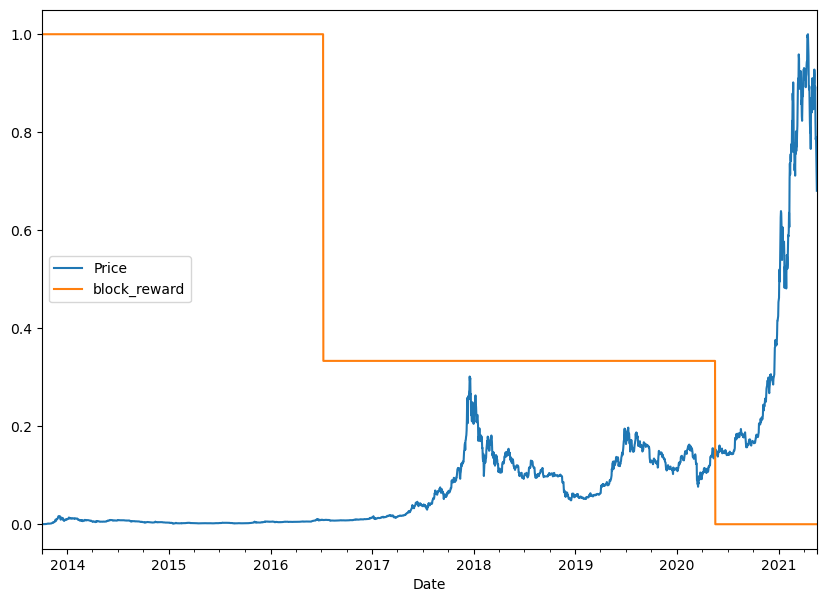

In [93]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices[["Price", "block_reward"]]),
                                    columns=bitcoin_prices.columns,
                                   index=bitcoin_prices.index)
scaled_price_block_df.plot(figsize=(10,7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've now got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [140]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [141]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25.0,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25.0,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25.0,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25.0,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25.0,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25.0,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25.0,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25.0,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8 block_reward] -> [9]
```

In [142]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [97]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [143]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)


In [99]:
# Set random seed for a reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model 
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation.
], name="model_6_multivariate") # name our model so we can save it.

# 2. Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[CreateModelCheckpoint("C:/Users/User/Time_series/checkpoints/"+model_6.name,"val_loss", False)])

Epoch 1/100
 1/18 [>.............................] - ETA: 9s - loss: 3511.0391 - mae: 3511.0391 - mse: 25407206.0000

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 1005.1609 - mae: 1005.1609 - mse: 4538967.5000 - val_loss: 1768.0039 - val_mae: 1768.0039 - val_mse: 7376218.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 211.8871 - mae: 211.8871 - mse: 228664.7656

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 32ms/step - loss: 238.3883 - mae: 238.3883 - mse: 232308.8750 - val_loss: 1331.9111 - val_mae: 1331.9111 - val_mse: 4495655.5000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 174.9586 - mae: 174.9586 - mse: 112147.7812

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 33ms/step - loss: 171.8498 - mae: 171.8498 - mse: 153092.5625 - val_loss: 832.2111 - val_mae: 832.2111 - val_mse: 2351577.2500
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 195.2931 - mae: 195.2931 - mse: 207657.7188

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 33ms/step - loss: 144.5530 - mae: 144.5530 - mse: 116999.1406 - val_loss: 766.9188 - val_mae: 766.9188 - val_mse: 1986989.6250
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 141.7115 - mae: 141.7115 - mse: 78021.4375

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 32ms/step - loss: 133.0650 - mae: 133.0650 - mse: 99547.8672 - val_loss: 694.4479 - val_mae: 694.4479 - val_mse: 1602852.8750
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 98.3861 - mae: 98.3861 - mse: 41566.3359

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 33ms/step - loss: 126.9509 - mae: 126.9509 - mse: 90816.5156 - val_loss: 667.6612 - val_mae: 667.6612 - val_mse: 1535914.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 125.9010 - mae: 125.9010 - mse: 136126.1406

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 33ms/step - loss: 125.0254 - mae: 125.0254 - mse: 89394.7344 - val_loss: 657.9300 - val_mae: 657.9300 - val_mse: 1449458.2500
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 118.8506 - mae: 118.8506 - mse: 83556.2422 - val_loss: 674.2564 - val_mae: 674.2564 - val_mse: 1532045.8750
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 123.3944 - mae: 123.3944 - mse: 88077.7109 - val_loss: 748.4602 - val_mae: 748.4602 - val_mse: 1651883.2500
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 146.4827 - mae: 146.4827 - mse: 105767.7734 - val_loss: 780.2396 - val_mae: 780.2396 - val_mse: 1862986.1250
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 129.9833 - mae: 129.9833 - mse: 88010.0000 - val_loss: 917.6185 - val_mae: 917.6185 - val_mse: 2190630.7500
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 137.4378 - mae: 137.4378 - ms

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 33ms/step - loss: 122.6276 - mae: 122.6276 - mse: 82146.7812 - val_loss: 654.4646 - val_mae: 654.4646 - val_mse: 1379891.3750
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 109.4322 - mae: 109.4322 - mse: 46877.2344

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 32ms/step - loss: 118.2685 - mae: 118.2685 - mse: 80519.5469 - val_loss: 605.4924 - val_mae: 605.4924 - val_mse: 1280078.0000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 98.0396 - mae: 98.0396 - mse: 45357.0547

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 42ms/step - loss: 110.7137 - mae: 110.7137 - mse: 73383.3438 - val_loss: 601.6807 - val_mae: 601.6807 - val_mse: 1278852.6250
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 114.0119 - mae: 114.0119 - mse: 74764.4375 - val_loss: 608.0391 - val_mae: 608.0391 - val_mse: 1270634.0000
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 117.2669 - mae: 117.2669 - mse: 78214.5703 - val_loss: 651.7151 - val_mae: 651.7151 - val_mse: 1351274.8750
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 116.8738 - mae: 116.8738 - mse: 77136.3828 - val_loss: 619.2328 - val_mae: 619.2328 - val_mse: 1283895.1250
Epoch 20/100
18/18 [==============================] - 0s 3ms/step - loss: 110.3437 - mae: 110.3437 - mse: 73410.0469 - val_loss: 633.8813 - val_mae: 633.8813 - val_mse: 1308726.0000
Epoch 21/100
18/18 [==============================] - 0s 3ms/step - loss: 117.1651 - mae: 117.1651 - m

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 32ms/step - loss: 115.6986 - mae: 115.6986 - mse: 73239.1875 - val_loss: 589.0779 - val_mae: 589.0779 - val_mse: 1239258.2500
Epoch 24/100
18/18 [==============================] - 0s 3ms/step - loss: 109.2578 - mae: 109.2578 - mse: 71527.3125 - val_loss: 593.8928 - val_mae: 593.8928 - val_mse: 1227672.2500
Epoch 25/100
18/18 [==============================] - 0s 3ms/step - loss: 108.4044 - mae: 108.4044 - mse: 70245.3047 - val_loss: 648.8776 - val_mae: 648.8776 - val_mse: 1380159.8750
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 111.9708 - mae: 111.9708 - mse: 61536.0820

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 31ms/step - loss: 109.3046 - mae: 109.3046 - mse: 70587.8906 - val_loss: 580.7784 - val_mae: 580.7784 - val_mse: 1202151.2500
Epoch 27/100
18/18 [==============================] - 0s 3ms/step - loss: 110.3774 - mae: 110.3774 - mse: 70819.8672 - val_loss: 742.8261 - val_mae: 742.8261 - val_mse: 1654368.2500
Epoch 28/100
18/18 [==============================] - 0s 3ms/step - loss: 121.1859 - mae: 121.1859 - mse: 75737.6719 - val_loss: 601.8005 - val_mae: 601.8005 - val_mse: 1231249.1250
Epoch 29/100
18/18 [==============================] - 0s 3ms/step - loss: 117.0822 - mae: 117.0822 - mse: 73489.9688 - val_loss: 654.5644 - val_mae: 654.5644 - val_mse: 1385724.3750
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 116.5983 - mae: 116.5983 - mse: 76370.6406 - val_loss: 594.5053 - val_mae: 594.5053 - val_mse: 1240775.1250
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 111.7164 - mae: 111.7164 - mse: 

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 32ms/step - loss: 108.5612 - mae: 108.5612 - mse: 68542.8047 - val_loss: 575.6296 - val_mae: 575.6296 - val_mse: 1188390.2500
Epoch 32/100
18/18 [==============================] - 0s 3ms/step - loss: 109.1320 - mae: 109.1320 - mse: 70808.2734 - val_loss: 576.7529 - val_mae: 576.7529 - val_mse: 1190236.0000
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 129.7798 - mae: 129.7798 - mse: 108113.3281

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 32ms/step - loss: 108.8296 - mae: 108.8296 - mse: 70781.5938 - val_loss: 575.0656 - val_mae: 575.0656 - val_mse: 1181734.7500
Epoch 34/100
18/18 [==============================] - 0s 3ms/step - loss: 107.9036 - mae: 107.9036 - mse: 69010.8672 - val_loss: 642.1321 - val_mae: 642.1321 - val_mse: 1346239.0000
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 106.3974 - mae: 106.3974 - mse: 69243.3359 - val_loss: 586.3089 - val_mae: 586.3089 - val_mse: 1215744.7500
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 109.6398 - mae: 109.6398 - mse: 69784.1562 - val_loss: 579.3107 - val_mae: 579.3107 - val_mse: 1181153.5000
Epoch 37/100
18/18 [==============================] - 0s 3ms/step - loss: 111.9736 - mae: 111.9736 - mse: 70406.1562 - val_loss: 587.1982 - val_mae: 587.1982 - val_mse: 1195028.8750
Epoch 38/100
18/18 [==============================] - 0s 3ms/step - loss: 111.3992 - mae: 111.3992 - m

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 30ms/step - loss: 111.4964 - mae: 111.4964 - mse: 74087.9531 - val_loss: 571.8873 - val_mae: 571.8873 - val_mse: 1172998.3750
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 105.7226 - mae: 105.7226 - mse: 67995.1641 - val_loss: 593.8967 - val_mae: 593.8967 - val_mse: 1231664.8750
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 107.7873 - mae: 107.7873 - mse: 68686.0312 - val_loss: 575.3820 - val_mae: 575.3820 - val_mse: 1188339.1250
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 117.1626 - mae: 117.1626 - mse: 77180.2109 - val_loss: 824.7258 - val_mae: 824.7258 - val_mse: 1810051.6250
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 127.8783 - mae: 127.8783 - mse: 78064.5781 - val_loss: 710.9149 - val_mae: 710.9149 - val_mse: 1539049.8750
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 119.4529 - mae: 119.4529 - m

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 34ms/step - loss: 104.9802 - mae: 104.9802 - mse: 67422.2656 - val_loss: 569.9335 - val_mae: 569.9335 - val_mse: 1173900.3750
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 88.6800 - mae: 88.6800 - mse: 35826.3516

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 33ms/step - loss: 106.0640 - mae: 106.0640 - mse: 66802.0000 - val_loss: 569.5726 - val_mae: 569.5726 - val_mse: 1171169.5000
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 109.1890 - mae: 109.1890 - mse: 69983.9766 - val_loss: 574.6183 - val_mae: 574.6183 - val_mse: 1182872.0000
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 104.2651 - mae: 104.2651 - mse: 65892.0469 - val_loss: 580.3839 - val_mae: 580.3839 - val_mse: 1178389.0000
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 104.3696 - mae: 104.3696 - mse: 66198.7500 - val_loss: 569.5905 - val_mae: 569.5905 - val_mse: 1166490.0000
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 107.5122 - mae: 107.5122 - mse: 68047.8906 - val_loss: 642.7548 - val_mae: 642.7548 - val_mse: 1298851.8750
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 137.5944 - mae: 137.5944 - mse: 

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_6_multivariate\assets


18/18 [==============================] - 1s 33ms/step - loss: 110.8096 - mae: 110.8096 - mse: 71695.7109 - val_loss: 568.8489 - val_mae: 568.8489 - val_mse: 1162805.6250
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 105.7153 - mae: 105.7153 - mse: 67533.5938 - val_loss: 592.8360 - val_mae: 592.8360 - val_mse: 1230338.1250
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 108.7586 - mae: 108.7586 - mse: 67744.7891 - val_loss: 705.0588 - val_mae: 705.0588 - val_mse: 1516559.0000
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 105.0121 - mae: 105.0121 - mse: 66025.4375 - val_loss: 570.4692 - val_mae: 570.4692 - val_mse: 1162593.6250
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 107.4892 - mae: 107.4892 - mse: 68034.8984 - val_loss: 607.2731 - val_mae: 607.2731 - val_mse: 1230325.6250
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 113.7709 - mae: 113.7709 - m

In [100]:
model_6.summary()

Model: "model_6_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0
_________________________________________________________________


In [101]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 569.4423 - mae: 569.4423 - mse: 1166596.6250


[569.4423217773438, 569.4423217773438, 1166596.625]

In [144]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("C:/Users/User/Time_series/checkpoints/model_6_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 568.8489 - mae: 568.8489 - mse: 1162805.5000


[568.848876953125, 568.848876953125, 1162805.5]

In [145]:
# Make predictions with multivariate model
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:10]

18/18 [==============================] - 0s 792us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8824.036 , 8761.461 , 9050.413 , 8763.675 , 8726.976 , 8746.309 ,
       8673.55  , 8501.5625, 8456.122 , 8529.966 ], dtype=float32)>

In [146]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 568.84906,
 'mse': 1162805.9,
 'rmse': 1078.3347,
 'mape': 2.5629802,
 'mase': 0.99931026}

In [105]:
model_1_results

{'mae': 570.385,
 'mse': 1173273.8,
 'rmse': 1083.1776,
 'mape': 2.5758228,
 'mase': 1.0020084}

## Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in figure 1 from the following paper:  
https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code.
* We will see how to use TensorFlow layer subclassing (to make our own custom layers).
* Get experience using the Functional API to create a custom architecture.
* Potentially get state of the art results on our problem.

### Buildings and testing the N-BEATS block layer

Because the N-Beats block layer doesn't exist in TensorFlow, we've got to create it.

To create customs layers and models in TensorFlow we can use subclassing:
https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing

In [27]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer): # Subclass of layer
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs): # the kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block contains stack of 4 fully connected layers each has a ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")
    
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

Let's test our NBeatsBlock class.

To do so we'll make some dummy inputs and outputs. 

In [147]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, #Backcast + Forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4) 

In [148]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) # Input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [109]:
tf.range(WINDOW_SIZE)+1

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7])>

In [149]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.24284679  0.45325455 -0.5902348  -0.3626231   0.16708153 -0.46856958
 -0.5116335 ]
Forecast: 0.6813797950744629


### Preparing data for the N-Beats algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data.guide:https://www.tensorflow.org/guide/data_performance?hl=fr

In [150]:
HORIZON = 1
WINDOW_SIZE = 7

In [112]:
# Create NBeats data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25.0
2013-10-02,125.45500,25.0
2013-10-03,108.58483,25.0
2013-10-04,118.67466,25.0
2013-10-05,121.33866,25.0


In [159]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.drop("block_reward", axis=1).copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head(10)    

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [160]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [161]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) # Ideal number of CPUs
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEASTS algorithm has a faire few numbers of parameters, many of them can be found in table 18: https://arxiv.org/pdf/1905.10437.pdf

In [162]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

The vanishing gradient happens when the model is very deeper (e.g 150 layers), by the time the values arrives at the last layers get so small. So the residual neural Ntworl allows the values to skip layers.

Before we can craft our N-BEATS model, we need two layers for the residual conections (subract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (session 3.2 of N-BEATS paper).

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network#:~:text=A%20Residual%20Neural%20Network%20.

and:https://paperswithcode.com/method/resnet


In [35]:
from tensorflow.keras import layers

In [163]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Substracted:{subtracted.numpy()}")
print(f"Added:{added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Substracted:[10 10 10 10 10 10 10 10 10 10]
Added:[10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `N-BEATSBLOCK` (this will be the initial block used for the network, the rest will be created as a part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecast for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `N-BeatsBlock` class within the for loop in (4) to create blocks which returns backcasts and block-level forecast
6. Create the double residual stacking using subtract and add layers
7. Puts the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll uses MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of the N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so long, we'll use a couple of callbacks:
 * Early Stopping
 * Reduce LR on plateau - if a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best performance) 

In [168]:
%%time

tf.random.set_seed(42)

# 1. Setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

    # 5. Use the N-BeatsBlock to calculate the backcast as well as the forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass in the residuals
    
    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
                          
# 9. Fit the model with EarlyStopping and ReduceOnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                           patience=100,
                                                           verbose=1)]) # If it doesn't improve it will restore best weights

In [165]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 259ms/step - loss: 3281.1267


3281.126708984375

In [166]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([7829.2505, 7765.059 , 7739.78  , 7657.284 , 7621.2637, 7557.004 ,
       7439.2896, 7430.4883, 7399.517 , 7313.2964], dtype=float32)>

In [167]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 3281.1267,
 'mse': 21453882.0,
 'rmse': 4631.8335,
 'mape': 16.12981,
 'mase': 5.764031}

In [122]:
model_1_results

{'mae': 570.385,
 'mse': 1173273.8,
 'rmse': 1083.1776,
 'mape': 2.5758228,
 'mase': 1.0020084}

In [123]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

Woah... even with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as `model_1` or the original naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting the N-BEATS architecture we've created 

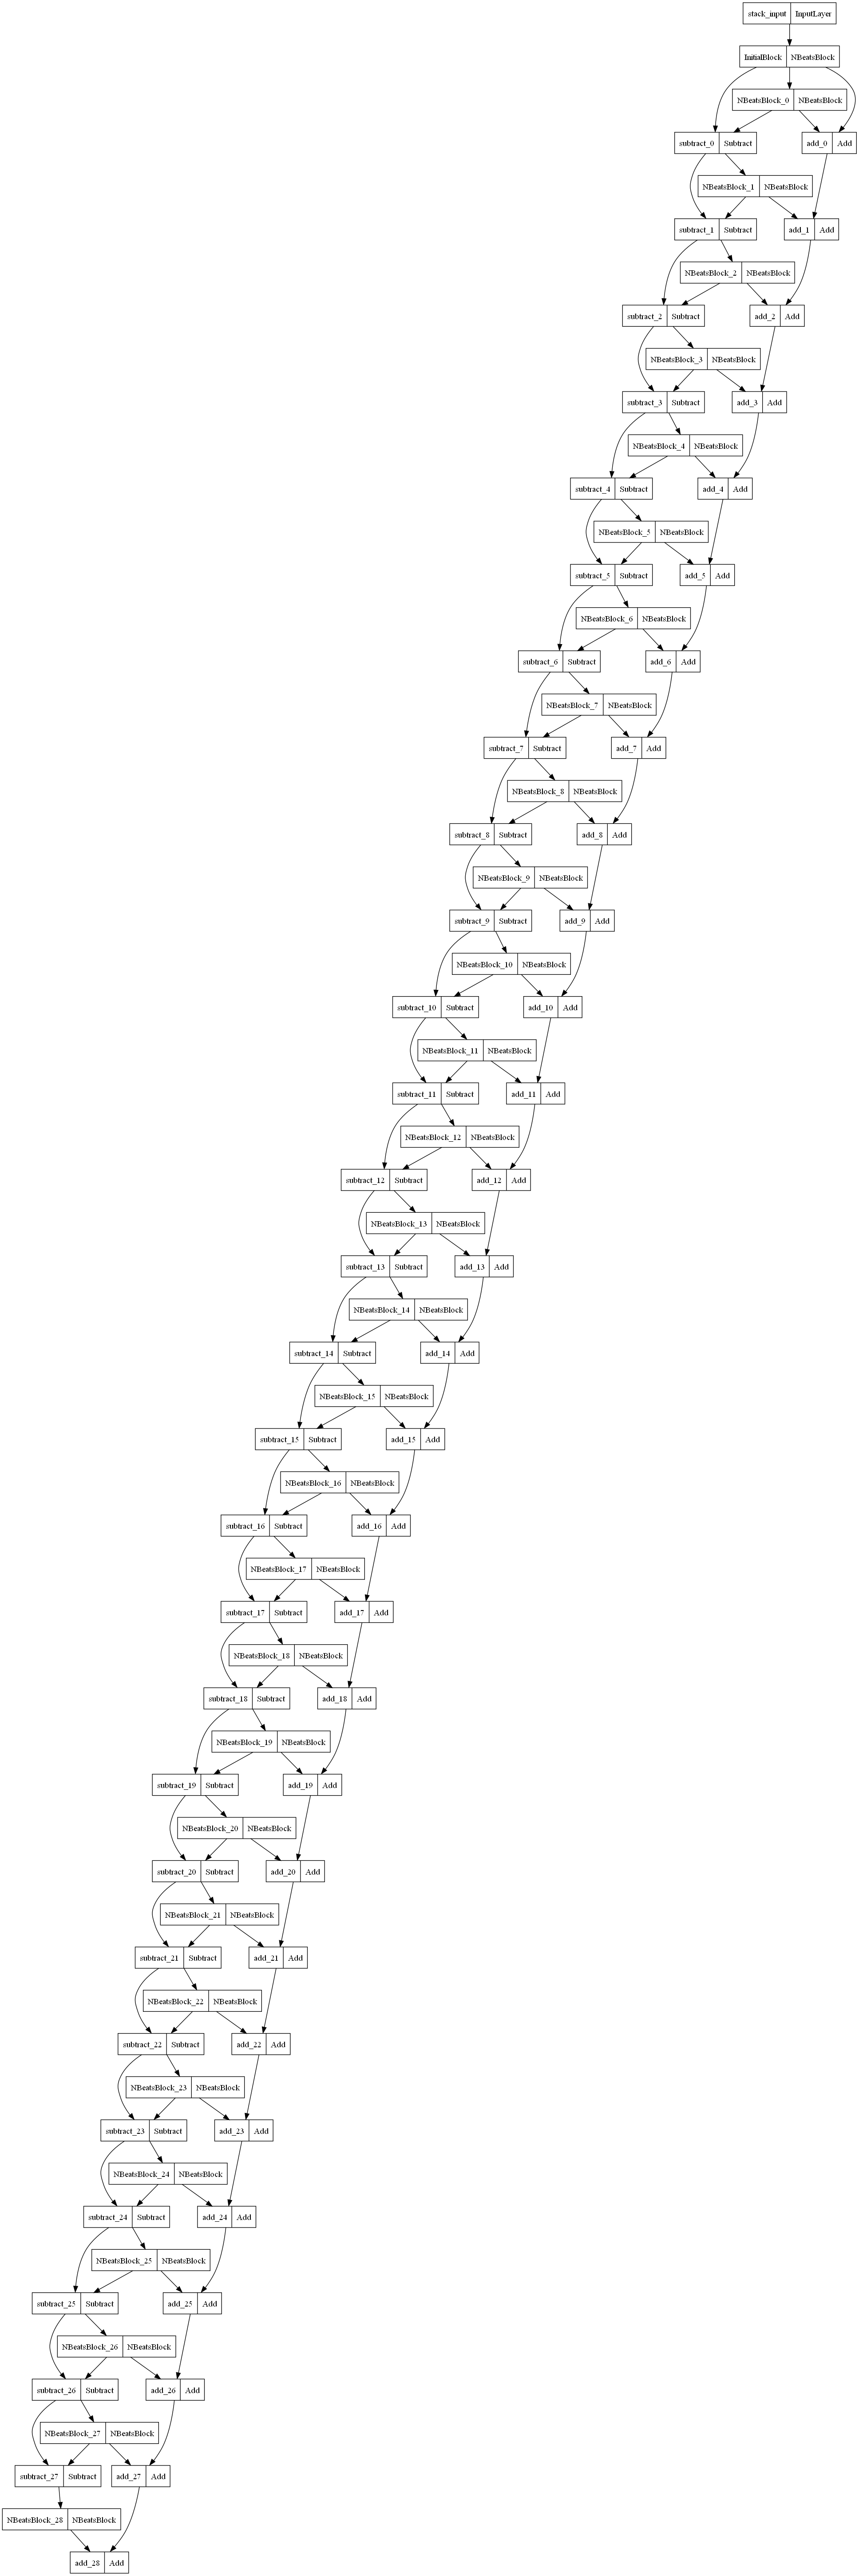

In [126]:
# Plot the N-BEATS model and inspect the architecture 
from tensorflow.keras.utils import plot_model
N_BeatsBlock_model = plot_model(model_7)
N_BeatsBlock_model

In [125]:
import matplotlib.pyplot as plt
plt.savefig('N_BeatsBlock_model.png')

<Figure size 640x480 with 0 Axes>

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many *differents* models to predict a common goal.

### Constructing and fitting an ensemble of models (using different loss functions) 

In [170]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
    """
    Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
    
    For example, if num_iter=10, a list of 30 trained models will be returned:
    10 * len(["mae", "mse", "mape"]).
    """
    # Make empty list for trained ensemble models
    ensemble_models = []
    
    # Create num_iter number of models per loss function 
    for i in range(num_iter):
        # Build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")
            
            # Construct a simple model (similar to model_1)
            model = tf.keras.Sequential([
                # Initialize dense layers with normal distribution for estimating prediction intervals later on
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(HORIZON),
                
            ])
            
            # Compile simple model with current loss function
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae", "mse"])
            
            # Fit the current model
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose=0,
                      validation_data=test_data,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                  patience=200,
                                                                  restore_best_weights=True),
                                tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                     patience=100,
                                                                     verbose=1)])
            
            # Appended fitted model to list of ensemble models
            ensemble_models.append(model)
            
    return ensemble_models

In [171]:
%%time

# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 831: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 931: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 107: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 662: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 762: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 313: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 909: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 208: ReduceLROnPlateau reduci

### Make predictions with our ensemble model

In [37]:
# Create  a function whiches uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [172]:
%%time
# Create a list of ensemble predictions

ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step
CPU times: total: 266 ms
Wall time: 720 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8748.295,  8727.158,  9055.22 , ..., 49608.324, 49245.82 ,
        45484.83 ],
       [ 8729.296,  8737.87 ,  9003.622, ..., 49784.395, 49004.418,
        45883.074],
       [ 8796.807,  8793.07 ,  9051.034, ..., 49951.21 , 48314.957,
        45265.883],
       ...,
       [ 8757.281,  8758.057,  9021.918, ..., 49415.28 , 48371.582,
        45639.562],
       [ 8749.261,  8714.69 ,  9084.353, ..., 49560.36 , 47688.844,
        45628.297],
       [ 8778.509,  8832.943,  9113.287, ..., 49800.996, 47288.668,
        46121.77 ]], dtype=float32)>

In [173]:
# Evaluate our ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

{'mae': 577.7135,
 'mse': 1175340.9,
 'rmse': 1084.0746,
 'mape': 2.6386445,
 'mase': 1.0148824}

Our ensemble preds come out in multiple dimensions but to combine them into **point prediction** we can leverage the mean of all the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [148]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8783.151, 8767.481, 9033.515, 8681.841, 8723.732, 8735.902,
       8631.64 , 8468.918, 8454.024, 8504.756], dtype=float32)>

In [149]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8791.959, 8780.109, 9050.356, 8697.933, 8727.936, 8742.895,
       8631.217, 8476.895, 8458.393, 8513.311], dtype=float32)

In [150]:
# Evaluate our ensemble model predictions
ensemble_mean_results = evaluate_preds(y_true=y_test,
                                       y_pred=ensemble_mean)
ensemble_mean_results

{'mae': 570.70575,
 'mse': 1150361.4,
 'rmse': 1072.549,
 'mape': 2.5736692,
 'mase': 1.002572}

In [151]:
# Evaluate our ensemble model predictions
ensemble_median_results = evaluate_preds(y_true=y_test,
                                       y_pred=ensemble_median)
ensemble_median_results

{'mae': 569.5897,
 'mse': 1148415.2,
 'rmse': 1071.6414,
 'mape': 2.5660136,
 'mase': 1.0006114}

### Plotting the prediction intervals (uncertainty estimates) of our ensembles

So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tommorow's price of Bitcoin will be $50,000 USD

Wouldn't it be helpful if we knew a range of where that prediction came from ?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD ?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the prediction from a number of randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the prediction
3. Multiply the stand deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviation of the mean)
4. To get the prediction interval upper and lower bounds, add and substract the value obtained in (3) to the mean/median of the predictions made in (1)

* https://en.wikipedia.org/wiki/97.5th_percentile_point
* https://twitter.com/chbt_sam/status/941018405850804225
                                                                     

In [38]:
# Find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized model 
    
    # 2. Measure the standard deviation of the predictions
    std = tf.math.reduce_std(preds, axis=0)
    
    # 3. Multiply the standard deviation by 1.96
    interval = 1.96 * std
    
    # 4. Get the prediction interval upper and lower bounds
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    
    return lower, upper

In [50]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8663.213 ,  8711.806 ,  8956.588 ,  8616.696 ,  8676.071 ,
         8600.098 ,  8544.51  ,  8406.143 ,  8355.083 ,  8425.974 ,
         8113.636 ,  8028.1396,  7964.5464,  7531.507 ,  7190.7505,
         7163.6255,  6961.319 ,  7105.482 ,  7022.6187,  7440.756 ,
         7306.1123,  7677.1743,  7462.919 ,  7325.3335,  7250.2036,
         7217.671 ,  7132.0527,  7321.353 ,  7415.58  ,  7473.474 ,
         7459.9727,  7233.1724,  7171.106 ,  7114.2007,  7100.0796,
         7163.6245,  7005.311 ,  7030.369 ,  6789.6377,  6504.802 ,
         7317.636 ,  7055.075 ,  7061.67  ,  7143.597 ,  7161.547 ,
         7067.03  ,  7131.2085,  7117.3833,  7111.354 ,  7137.958 ,
         7220.0093,  7312.3325,  7166.4346,  7088.1343,  7087.743 ,
         6868.553 ,  7207.5503,  7238.1543,  7298.675 ,  7619.8276,
         7965.5127,  8074.3496,  7747.2437,  8039.039 ,  7991.712 ,
         8094.299 ,  8015.507 ,  8657.746 ,  8807.84  ,  8686.561 ,

> **Resources:** Many of the steps we've taken above have inspired/referenced from the Machine Learning blog post on https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/

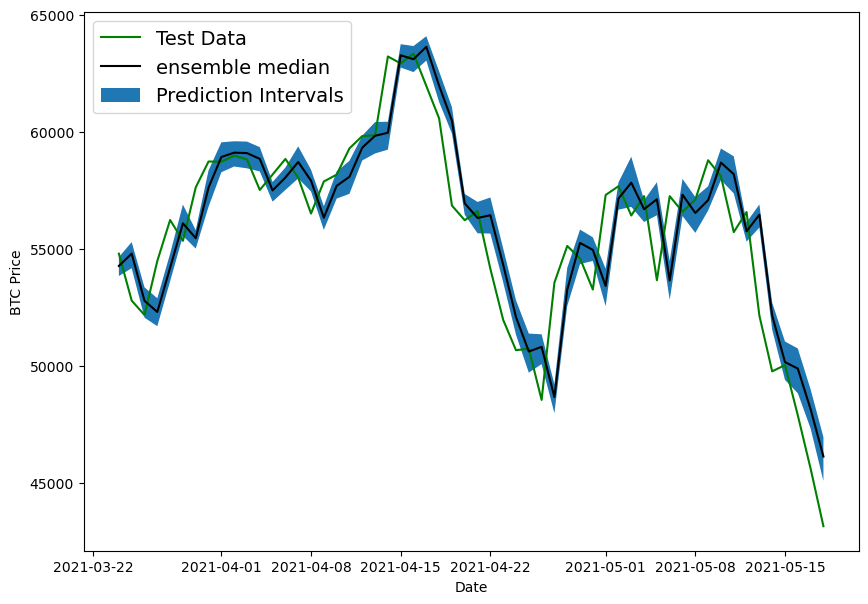

In [53]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the prediction fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="ensemble median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between:https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html
plt.fill_between(X_test.index[offset:],
                (lower)[offset:],
                (upper)[offset:],
                 label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

So far all of our models predictions have been lagging behind the test data...
As if they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑 **Note:** These predictions intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitavely and quantitatively answer the questions: 
1. What can my model know ? (with perfect data, what's possible for a model to learn ?)
2. What doesn't my model know ? (what can a model never predict ? Or would it be helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not ?)    

There are two types of uncertainty in machine learning you should be aware of:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced, it is also referred to as "data" or "subway" uncertainty.
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty, it is very hard to calculate.
* https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future

So far our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [55]:
HORIZON = 1
WINDOW_SIZE = 7

In [59]:
bitcoin_prices_windowed.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [51]:
# Train model to entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [58]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [53]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [54]:
%%time

tf.random.set_seed(42)

# Create a model (nice and sample, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit our model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0,
            callbacks=[CreateModelCheckpoint("C:/Users/User/Time_series/checkpoints/"+model_9.name,"loss", False)])

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


CPU times: total: 7.95 s
Wall time: 18.4 s


### Make predictions into future

In [39]:
# How many timesteps to predict int othe future ?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input: 
* a list of values (Bitcoin historical data)
* a trained model (such as `model_9`)
* a window into the future to predict (our `INTO_FUTURE` variable)
* the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Create an empty list for future forecasts this will be returned at the end of the function, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [74]:
y_all[-WINDOW_SIZE:]

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [40]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    """
    Make future forecasts into future steps after values ends.
    
    Returns future forecasts as a list of floats.
    """
    # 2. Create an empty list for future forecasts/prepare to forecast on
    future_forecast = []
    last_window = values[-WINDOW_SIZE:]
    
    # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
    for _ in range(INTO_FUTURE):
        # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
        
        # Append predictions to future_forecast
        future_forecast.append(tf.squeeze(future_pred).numpy())
        
        # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
        
    return future_forecast

> 🛠 **Exercise:** In terms of a forecasting model, what might another approach to our make_future_forecasts() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.
>
> So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.
>
>As it is, the make_future_forecasts() function skips the retraining of a model part.

In [55]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 50ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55657.796875

1/1 [==============================] - 0s 16ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55657.796875  ] -> Prediction: 50396.96875

1/1 [==============================] - 0s 16ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55657.796875   50396.96875   ] -> Prediction: 50284.3359375

1/1 [==============================] - 0s 15ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55657.796875   50396.96875    50284.3359375 ] -> Prediction: 48723.796875

1/1 [==============================] - 0s 15ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55657.796875
 50396.96875    50284.3359375  48723.796875  ] -> Pre

### Plot future forecasts

In [86]:
future_forecast

[55090.387,
 51633.92,
 50186.285,
 47862.766,
 45933.66,
 45728.273,
 48543.766,
 54290.582,
 51143.18,
 48724.574,
 46000.836,
 45636.906,
 47796.668,
 51461.75]

In [41]:
def get_future_dates(start_date, into_future, offset=1):
    """
    Returns array of datetime values ranging from start_date to start_date+into_future
    """
    start_date = start_date + np.timedelta64(offset, "D") # Specify start date, D stand for day
    end_date = start_date + np.timedelta64(into_future, "D") # Specify end date
    return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [42]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [44]:
type(last_timestep)

pandas._libs.tslibs.timestamps.Timestamp

In [74]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [47]:
import matplotlib.pyplot as plt

In [75]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 56466.516, 51488.07 , 50489.79 , 50058.06 , 47020.48 ,
        45161.32 , 45027.184, 56595.85 , 51172.582, 51221.816, 49873.637,
        46177.383, 45270.254, 46049.824], dtype=float32))

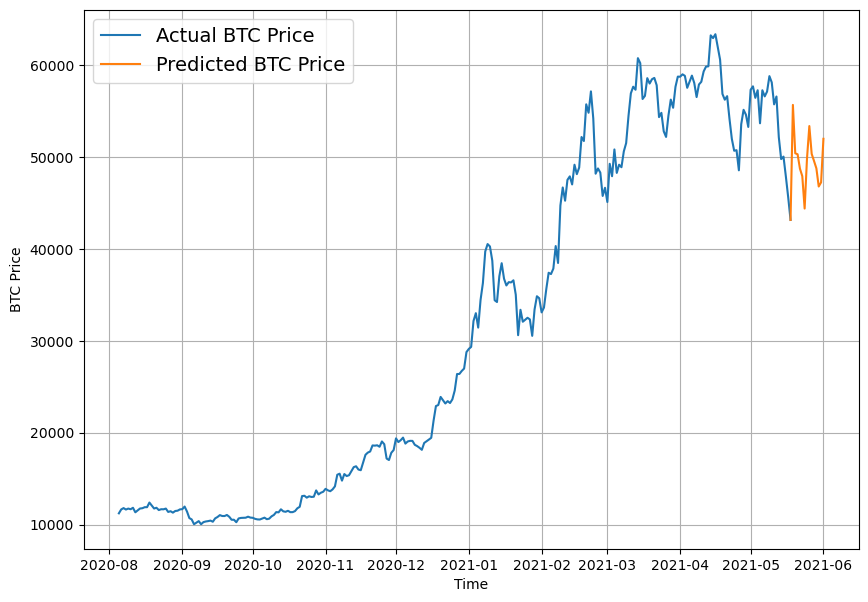

In [58]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [70]:
# Add retraining into make future predictions
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    """
    Make future forecasts into future steps after values ends.
    
    Returns future forecasts as a list of floats.
    """
    # 2. Create an empty list for future forecasts/prepare to forecast on
    future_forecast = []
    last_window = values[-WINDOW_SIZE:]
    
    # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
    for _ in range(INTO_FUTURE):
        # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
        
        # Append predictions to future_forecast
        future_forecast.append(tf.squeeze(future_pred).numpy())
        
        # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
        
        # Add our newest prediction
        np.append(y_all, future_forecast[-1])
        
        # Add next date
        np.append(X_all, last_window)
        
        # Turn data into efficient running tensors
        features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
        labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

        # Combine features and labels
        dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

        # Batch and prefetch
        BATCH_SIZE = 1024
        dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
        
        # Fit our model on all of the data to make future forecasts
        model_9.fit(dataset_all,
                    epochs=100,
                    verbose=0,
                    callbacks=[CreateModelCheckpoint("C:/Users/User/Time_series/checkpoints/"+model_9.name,"loss", False)])
        
    return future_forecast

In [71]:
%%time
# Make forecasts into the future with data uploaded
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 16ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 56466.515625



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 16ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56466.515625  ] -> Prediction: 51488.0703125



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 16ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56466.515625   51488.0703125 ] -> Prediction: 50489.7890625



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 17ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56466.515625   51488.0703125  50489.7890625 ] -> Prediction: 50058.05859375



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 17ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 56466.515625
 51488.0703125  50489.7890625  50058.05859375] -> Prediction: 47020.48046875



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 17ms/step
Predicting on:
 [45604.61575361 43144.47129086 56466.515625   51488.0703125
 50489.7890625  50058.05859375 47020.48046875] -> Prediction: 45161.3203125



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 18ms/step
Predicting on:
 [43144.47129086 56466.515625   51488.0703125  50489.7890625
 50058.05859375 47020.48046875 45161.3203125 ] -> Prediction: 45027.18359375



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 16ms/step
Predicting on:
 [56466.515625   51488.0703125  50489.7890625  50058.05859375
 47020.48046875 45161.3203125  45027.18359375] -> Prediction: 56595.8515625



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 17ms/step
Predicting on:
 [51488.0703125  50489.7890625  50058.05859375 47020.48046875
 45161.3203125  45027.18359375 56595.8515625 ] -> Prediction: 51172.58203125



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 16ms/step
Predicting on:
 [50489.7890625  50058.05859375 47020.48046875 45161.3203125
 45027.18359375 56595.8515625  51172.58203125] -> Prediction: 51221.81640625



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 16ms/step
Predicting on:
 [50058.05859375 47020.48046875 45161.3203125  45027.18359375
 56595.8515625  51172.58203125 51221.81640625] -> Prediction: 49873.63671875



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 17ms/step
Predicting on:
 [47020.48046875 45161.3203125  45027.18359375 56595.8515625
 51172.58203125 51221.81640625 49873.63671875] -> Prediction: 46177.3828125



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 16ms/step
Predicting on:
 [45161.3203125  45027.18359375 56595.8515625  51172.58203125
 51221.81640625 49873.63671875 46177.3828125 ] -> Prediction: 45270.25390625



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


1/1 [==============================] - 0s 18ms/step
Predicting on:
 [45027.18359375 56595.8515625  51172.58203125 51221.81640625
 49873.63671875 46177.3828125  45270.25390625] -> Prediction: 46049.82421875



INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_9_future_model\assets


CPU times: total: 50.1 s
Wall time: 1min 52s


In [ ]:
# Insert future forecasts so the plot doesn't look janky
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

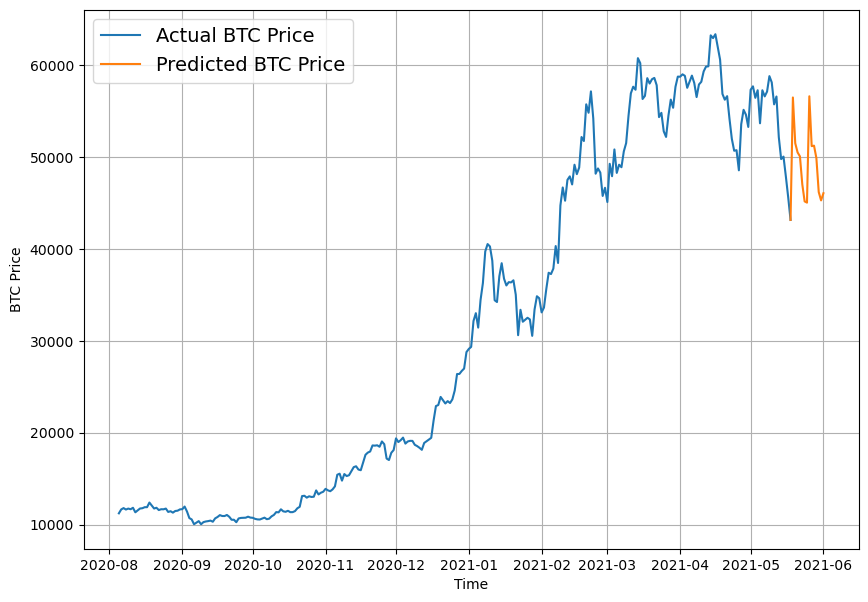

In [76]:
# Plot our retrained forecast
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [77]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [78]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [79]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

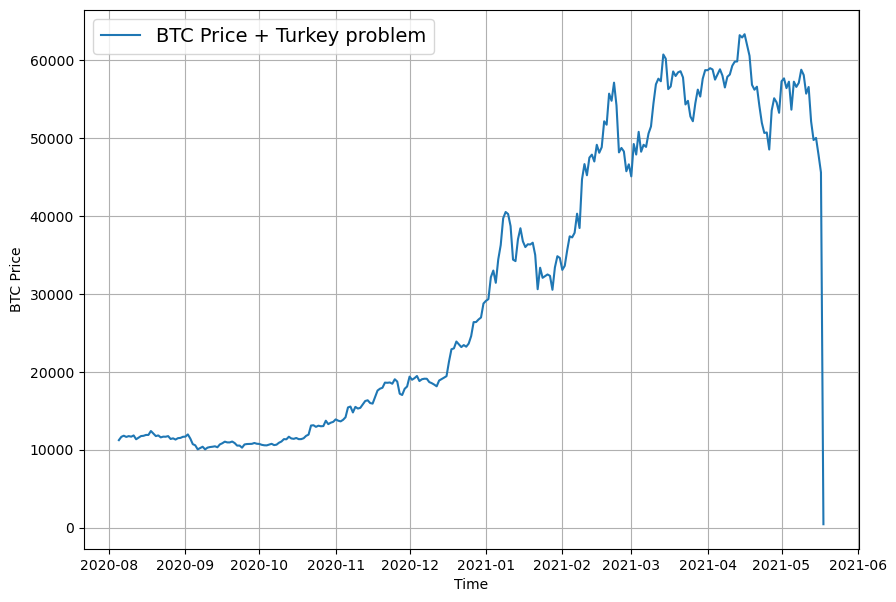

In [80]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500)

In [81]:
# Create train and test sets for turkey problem
full_windows, full_labels = make_windows(np.array(btc_price_turkey),
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(y_train), len(X_test), len(y_test)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361   431.44471291]]


(2224, 2224, 556, 556)

### Build a turkey model (model to predict on turkey)

In [83]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data 
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train,
                 y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[CreateModelCheckpoint("C:/Users/User/Time_series/checkpoints/"+turkey_model.name,"val_loss", False)])

INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: C:/Users/User/Time_series/checkpoints\model_10_turkey_model\assets


In [84]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 850us/step - loss: 744.5768


744.5767822265625

In [87]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("C:/Users/User/Time_series/checkpoints/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 938us/step - loss: 646.0396


646.0396118164062

In [179]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 781us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9279.476, 9260.215, 9415.566, 9370.131, 9372.666, 9197.081,
       8793.826, 8889.772, 9053.884, 8750.475], dtype=float32)>

In [180]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=tf.squeeze(y_test),
                                y_pred=turkey_preds)
turkey_results

{'mae': 1708.7158,
 'mse': 9075321.0,
 'rmse': 3012.5273,
 'mape': 7.537801,
 'mase': 3.0017405}

In [97]:
model_1_results

{'mae': 581.23065,
 'mse': 1201153.8,
 'rmse': 1095.9716,
 'mape': 2.6043448,
 'mase': 1.0210613}

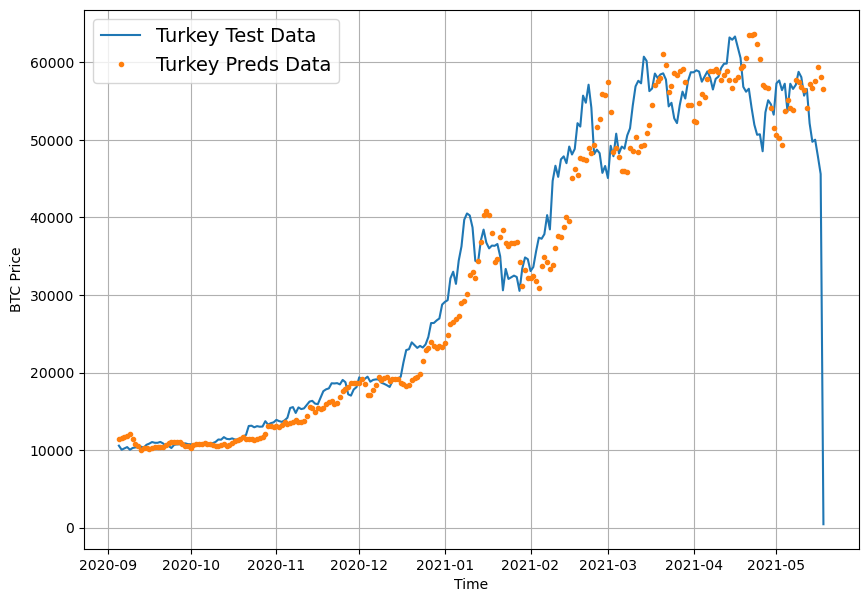

In [181]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds Data",
                 start=offset);

## Compare models

In [182]:
# Compare different model results (w = window, h = horizon, e.g w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              #"model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,581.230652,1201153.750,1095.971558,2.604345,1.021061
model_2_dense_w30_h1,620.946106,1320969.000,1149.334106,2.803078,1.085420
model_3_dense_w30_h7,1242.685791,5470364.500,1425.788330,5.660402,2.211290
model_4_CONV1D,575.196045,1192873.250,1092.187378,2.570080,1.010460
model_5_LSTM,592.282715,1260024.875,1122.508301,2.668217,1.040477
model_6_multivariate,568.849060,1162805.875,1078.334717,2.562980,0.999310
model_8_ensemble,577.713501,1175340.875,1084.074585,2.638644,1.014882
model_10_turkey,1708.715820,9075321.000,3012.527344,7.537801,3.001740


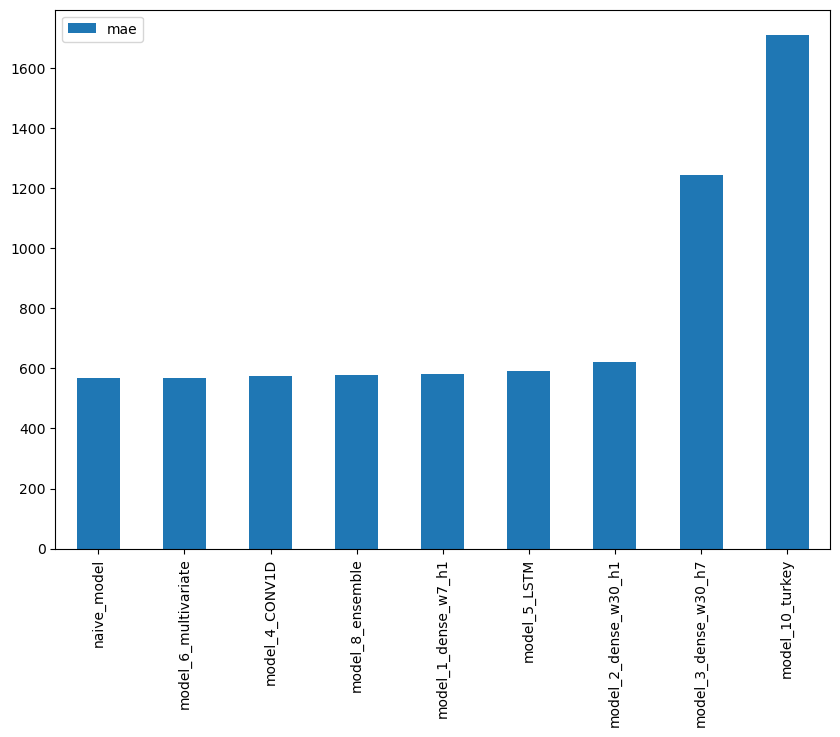

In [183]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");